In [1]:
import pandas as pd
df = pd.read_excel("C:\\Users\\user\\Downloads\\WEEK_1_Disney_plus.xlsx",encoding = 'latin-1')
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', df.shape[0]+1)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


In [172]:
df.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,2019-11-12 23:59:59,lilrock023,NaN,1,0,0,Just keep feeding into that monopoly with #DisneyPlus. How does it feel to have a mouse having YOU by the tail? pic.twitter.com/BQVSv4ad1O,NaN,NaN,#DisneyPlus,1.194405e+18,https://twitter.com/lilrock023/status/1194404502574698496
1,2019-11-12 23:59:54,DarborDragon,NaN,2,0,6,"So like many people, I logged in to Disney Plus tonight to look around. The very first thing I watched was a Pixar Short, Bao. I had forgotten the intensity of emotion - I was sobbing by the end. #DisneyPlus #Baopic.twitter.com/ZiUBcNRZqh",NaN,NaN,#DisneyPlus #Baopic,1.194404e+18,https://twitter.com/DarborDragon/status/1194404483696070656
2,2019-11-12 23:59:53,cheekybyun,NaN,1,0,1,DONT LOOK UNDER THE BED IS ON HERE LETS GO #DisneyPlus,NaN,NaN,#DisneyPlus,1.194404e+18,https://twitter.com/cheekybyun/status/1194404479535325184
3,2019-11-12 23:59:51,ALowd34,NaN,1,0,1,"@FFHitman dang man, Jeff Goldblum stoke your gig! #Sneakers #DisneyPlus pic.twitter.com/hPl3qbuaNz",NaN,NaN,#Sneakers #DisneyPlus,1.194404e+18,https://twitter.com/ALowd34/status/1194404470622474240
4,2019-11-12 23:59:50,JoshuaGill138,NaN,0,0,0,All Iâ€™ve done today is sit on my couch and watch #DisneyPlus re- living my youth. Iâ€™m suppose to have weekends off starting next mo th but Iâ€™ll probably just end up doing this lol.,NaN,NaN,#DisneyPlus,1.194404e+18,https://twitter.com/JoshuaGill138/status/1194404467652714496


# Preprocessing and bag of words

In [173]:
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer
import nltk
from collections import Counter
sent = nltk.word_tokenize(str(df.text))
lower_token =[t.lower() for t in sent]
alpha_only = [t for t in (lower_token) if t.isalpha()]
stop_words = [t for t in alpha_only if t not in ENGLISH_STOP_WORDS ]
k = WordNetLemmatizer()
lemma = [k.lemmatize(t) for t in stop_words]
bow = Counter(lemma)
print(bow.most_common(10))

[('disneyplus', 15802), ('disney', 2594), ('http', 2311), ('watching', 1410), ('movie', 1376), ('watch', 1338), ('themandalorian', 1175), ('just', 1093), ('starwars', 965), ('episode', 957)]


In [174]:
print(bow.most_common(20))

[('disneyplus', 15802), ('disney', 2594), ('http', 2311), ('watching', 1410), ('movie', 1376), ('watch', 1338), ('themandalorian', 1175), ('just', 1093), ('starwars', 965), ('episode', 957), ('like', 786), ('mandalorian', 703), ('time', 697), ('new', 664), ('day', 651), ('got', 614), ('ladyandthetramp', 582), ('year', 549), ('thing', 539), ('love', 520)]


In [175]:
from gensim.corpora.dictionary import Dictionary
dic = Dictionary([lemma])
corpus = [dic.doc2bow(t) for t in [lemma]]
corpus[0][:10]

[(0, 4),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 2),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1)]

In [176]:
doc = corpus[0]
duc = sorted(doc, key = lambda w:w[1],reverse = True)
for word_id, word_count in duc[:20]:
    print(dic.get(word_id),word_count)

disneyplus 15802
disney 2594
http 2311
watching 1410
movie 1376
watch 1338
themandalorian 1175
just 1093
starwars 965
episode 957
like 786
mandalorian 703
time 697
new 664
day 651
got 614
ladyandthetramp 582
year 549
thing 539
love 520


WordCloud

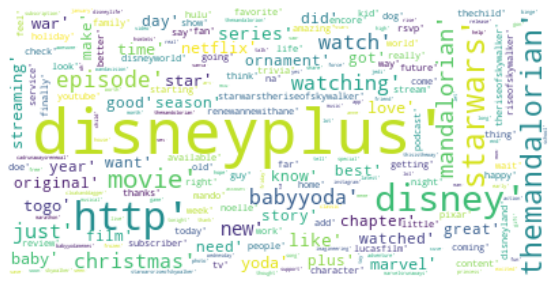

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

picture = WordCloud(background_color = 'White',collocations = False).generate(str(lemma))
fig = plt.figure(figsize=(13,5))
plt.imshow(picture,interpolation = 'bilinear')
plt.axis('off')
plt.show()


Word-Tagging

In [2]:
import nltk
sentence = nltk.sent_tokenize(str(df.text))
token_word = [nltk.word_tokenize(t) for t in sentence]

In [3]:
pos_sent = [nltk.pos_tag(t) for t in token_word]
chunk_sentence = nltk.ne_chunk_sents(pos_sent, binary = True)

In [13]:
import collections
from collections import defaultdict
import matplotlib.pyplot as plt


chunk_sentence = nltk.ne_chunk_sents(pos_sent, binary = False)
ner_categories=collections.defaultdict(int)

for sent in chunk_sentence:
    for chunk in sent:
        if hasattr(chunk,'label'):
            ner_categories[chunk.label()] += 1
            
print(ner_categories)


defaultdict(<class 'int'>, {'ORGANIZATION': 21067, 'PERSON': 5909, 'GPE': 3181, 'GSP': 25, 'FACILITY': 62, 'LOCATION': 26})


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


([<matplotlib.patches.Wedge at 0x205fc9aca20>,
 [Text(-0.6425802609321034, 0.892799310181426, 'ORGANIZATION'),
  Text(0.31715028037904847, -1.0532880421116966, 'PERSON'),
  Text(1.040153968881249, -0.3578822725710036, 'GPE')])

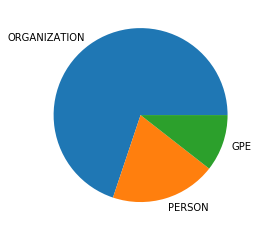

In [23]:
ddict = defaultdict(list)
for key,values in ner_categories.items():
    if key in ['ORGANIZATION','PERSON','GPE']:
        ddict[key].append(values)
        
ddict   

labels = list(ddict.keys())
values = [ddict.get(l) for l in labels]

plt.pie(values,labels=labels)

In [73]:
labels

['ORGANIZATION', 'PERSON', 'FACILITY', 'GPE', 'GSP', 'LOCATION']

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


Text(0.5, 1.0, 'first_week')

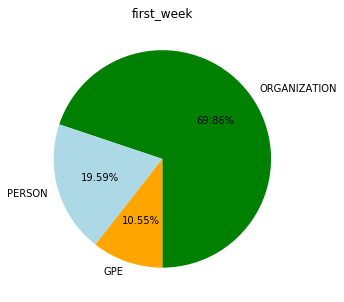

In [25]:
plt.figure(figsize = (5,5))
plt.pie(values, labels=labels, autopct = '%1.2f%%',startangle = 270,colors = ('green','lightblue','orange'))
plt.title('first_week')

snetiment analysis

In [5]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sentiment_scores = df_new.apply(sid.polarity_scores)
sentiment_scores

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


0        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}          
1        {'neg': 0.115, 'neu': 0.814, 'pos': 0.071, 'compound': -0.1796}
2        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}          
3        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}          
4        {'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'compound': 0.657}    
5        {'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.34}     
6        {'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'compound': 0.4404}   
7        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}          
8        {'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.9205}       
9        {'neg': 0.071, 'neu': 0.829, 'pos': 0.1, 'compound': 0.243}    
10       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}          
11       {'neg': 0.129, 'neu': 0.48, 'pos': 0.391, 'compound': 0.9268}  
12       {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.5942}   
13       {'neg': 0.0, 'neu': 0.858, 'pos': 0.142, '

In [17]:
from collections import defaultdict
intermediate = defaultdict(list)

for subdict in sentiment_scores:#先選每一行
    for key, value in subdict.items():#items就同時包含了key和value兩個都要!
        intermediate[key].append(value)
intermediate

defaultdict(list,
            {'neg': [0.0,
              0.115,
              0.0,
              0.0,
              0.0,
              0.0,
              0.0,
              0.0,
              0.0,
              0.071,
              0.0,
              0.129,
              0.0,
              0.0,
              0.105,
              0.0,
              0.194,
              0.0,
              0.138,
              0.0,
              0.0,
              0.0,
              0.0,
              0.0,
              0.0,
              0.0,
              0.077,
              0.0,
              0.0,
              0.077,
              0.0,
              0.0,
              0.0,
              0.167,
              0.0,
              0.0,
              0.0,
              0.238,
              0.0,
              0.0,
              0.0,
              0.0,
              0.0,
              0.0,
              0.0,
              0.0,
              0.058,
              0.205,
              0.0,
              0.0,
 

In [48]:
for key, value in intermediate.items():
    print(key, sum(value)/len(value))

neg 0.044528823487392025
neu 0.8342300164297426
pos 0.12123887420530019
compound 0.19230367169083487


In [43]:
new  = pd.DataFrame.from_dict(intermediate,orient = 'index')

new = new.T
new.head(10)

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.115,0.814,0.071,-0.1796
2,0.000,1.000,0.000,0.0000
3,0.000,1.000,0.000,0.0000
4,0.000,0.886,0.114,0.6570
5,0.000,0.745,0.255,0.3400
6,0.000,0.896,0.104,0.4404
7,0.000,1.000,0.000,0.0000
8,0.000,0.700,0.300,0.9205
9,0.071,0.829,0.100,0.2430


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sentiment_scores = df_new.apply(sid.polarity_scores)
sentiment_scores

from collections import defaultdict
intermediate = defaultdict(list)

for subdict in sentiment_scores:
    for key, value in subdict.items():
        intermediate[key].append(value)
intermediate

for key, value in intermediate.items():
    print(key, sum(value)/len(value))
    
new  = pd.DataFrame.from_dict(intermediate,orient = 'index')

new = new.T
new.head(10)


In [33]:
new.describe()

,neg,neu,pos,compound
count,13999.000000,13999.000000,13999.000000,13999.000000
mean,0.044529,0.834230,0.121239,0.192304
std,0.087209,0.152909,0.140690,0.421354
min,0.000000,0.071000,0.000000,-0.970900
25%,0.000000,0.731000,0.000000,0.000000
50%,0.000000,0.844000,0.085000,0.000000
75%,0.061000,1.000000,0.210000,0.557400
max,0.649000,1.000000,0.929000,0.985400


In [47]:
len(new.loc[new['compound']>0,'compound'])

6910

In [4]:
df.isna().sum()

date         0    
username     0    
to           12893
replies      0    
retweets     0    
favorites    0    
text         1    
geo          14000
mentions     13980
hashtags     68   
id           68   
permalink    68   
dtype: int64

In [4]:
df_new = df['text'].dropna(how = 'any')

In [26]:
df_2 = pd.read_excel("C:\\Users\\user\\Downloads\\WEEK_3_Disney_Plus.xlsx")

In [35]:
df_2.isna().sum()

date         0   
username     0   
to           5617
replies      0   
retweets     0   
favorites    0   
text         0   
geo          6115
mentions     6100
hashtags     62  
id           62  
permalink    62  
dtype: int64

preprocessing and bag of words

In [186]:
sent = nltk.word_tokenize(str(df_2.text))
lower_token =[t.lower() for t in sent]
alpha_only = [t for t in (lower_token) if t.isalpha()]
stop_words = [t for t in alpha_only if t not in ENGLISH_STOP_WORDS ]
k = WordNetLemmatizer()
lemma = [k.lemmatize(t) for t in stop_words]
bow = Counter(lemma)
print(bow.most_common(10))

[('disneyplus', 6687), ('http', 1915), ('disney', 1515), ('starwars', 1062), ('themandalorian', 957), ('mandalorian', 661), ('movie', 657), ('episode', 571), ('babyyoda', 568), ('watching', 516)]


In [187]:
from gensim.corpora.dictionary import Dictionary
dic = Dictionary([lemma])
corpus = [dic.doc2bow(t) for t in [lemma]]
corpus[0][:10]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 2),
 (8, 1),
 (9, 11)]

In [188]:
doc = corpus[0]
duc = sorted(doc, key = lambda w:w[1],reverse = True)
for word_id, word_count in duc[:20]:
    print(dic.get(word_id),word_count)

disneyplus 6687
http 1915
disney 1515
starwars 1062
themandalorian 957
mandalorian 661
movie 657
episode 571
babyyoda 568
watching 516
just 480
watch 462
new 434
yoda 412
baby 350
like 322
time 289
day 285
love 281
series 272


wordcloud

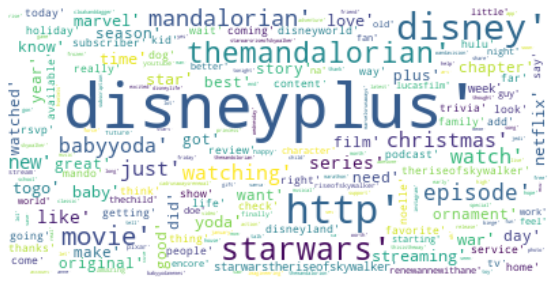

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

picture = WordCloud(background_color = 'White',collocations = False).generate(str(lemma))
fig = plt.figure(figsize=(13,5))
plt.imshow(picture, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Word_Tagging

In [27]:
import collections
sentence = nltk.sent_tokenize(str(df_2.text))
token_word = [nltk.word_tokenize(t) for t in sentence]
pos_sent = [nltk.pos_tag(t) for t in token_word]
chunk_sentence = nltk.ne_chunk_sents(pos_sent, binary = False)
ner_categories = collections.defaultdict(float)

for sent in chunk_sentence:
    for chunk in sent:
        if hasattr(chunk,'label'):
            ner_categories[chunk.label()] += 1
print(ner_categories)            



defaultdict(<class 'float'>, {'GPE': 1785.0, 'PERSON': 3409.0, 'ORGANIZATION': 10699.0, 'GSP': 7.0, 'FACILITY': 31.0, 'LOCATION': 5.0})


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


([<matplotlib.patches.Wedge at 0x205e9b0a668>,
 [Text(1.0322332465205297, 0.3801243543601064, 'GPE'),
  Text(0.2090917637936611, 1.0799447366942698, 'PERSON'),
  Text(-0.5694042886156951, -0.9411581992981064, 'ORGANIZATION')])

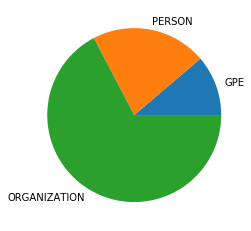

In [28]:
ddict = defaultdict(list)
for key,values in ner_categories.items():
    if key in ['ORGANIZATION','PERSON','GPE']:
        ddict[key].append(values)
        
ddict   

labels = list(ddict.keys())
values = [ddict.get(l) for l in labels]

plt.pie(values,labels=labels)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


Text(0.5, 1.0, 'third_week')

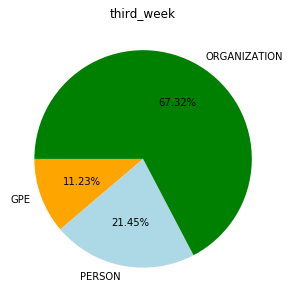

In [30]:
plt.figure(figsize = (5,5))
plt.pie(values, labels=labels, autopct = '%1.2f%%',startangle = 180,colors = ('orange','lightblue','green'))
plt.title('third_week')

In [28]:
chunk_sentence = nltk.ne_chunk_sents(pos_sent, binary = True)

for sent in chunk_sentence:
    for chunk in sent:
        if hasattr(chunk,'label') and chunk.label() == 'NE':
            print(chunk)

(NE Good/JJ)
(NE Place/NN)
(NE Good/JJ Girls/NNP)
(NE Boy/NNP Meets/NNP)
(NE LadyAndTheTramp/NNP)
(NE BabyYoda/NNP)
(NE MACcosmetics/NNP)
(NE DisneyPlus/NNP)
(NE ORIGINAL/NNP)
(NE Amazon/NNP)
(NE PAPERBACK/NNP)
(NE Midas/NNP Touch/NNP Review/NNP)
(NE Geeks/NNP)
(NE Star/NNP Wars/NNP)
(NE TsTiDotCom/NNP)
(NE Twitch/NNP)
(NE BabyYoda/NNP)
(NE JonathanAntoine/NNP)
(NE WaltDisney/NNP)
(NE Midas/NNP Touch/NNP Review/NNP)
(NE Captain/NNP Marvel/NNP)
(NE Nick/NNP Fury/NNP)
(NE MightyVicious/NNP)
(NE TsTiDotCom/NNP)
(NE BabyYoda/NNP)
(NE DisneyPlus/NNP)
(NE Muppet/NNP Treasure/NNP Island/NNP)
(NE DisneyPlus/NNP)
(NE Camp/NNP Rock/NNP)
(NE MyVMK/NNP)
(NE OTT/NNP)
(NE DisneyPlus/NNP)
(NE Netflix/NNP)
(NE HBOMax/NNP)
(NE Black/NNP Widow/NNP Trailer/NNP)
(NE Thirsty/NNP Widow/NNP)
(NE DisneyPlus/NNP)
(NE Mark/NNP Pidgeon/NNP)
(NE VP/NNP)
(NE Sumo/NNP Logic/NNP)
(NE CTOs/NNP)
(NE CIOs/NNP)
(NE WaltDisney/NNP)
(NE Disney/NNP)
(NE TOMORROW/NNP)
(NE DisneyChannel/NNP)
(NE DisneyPlus/NNP)
(NE Baby/NNP)

(NE DisneyPlus/NNP)
(NE Rizzo/NNP)
(NE Grease/NNP)
(NE GeekDigPod/NNP)
(NE StarWars/NNP)
(NE Reel/NNP Appeal/NNP)
(NE Star/NNP Wars/NNP)
(NE ENJOY/NN)
(NE Yoda/NNP)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP)
(NE BabyYodameme/NNP)
(NE BabyYoda/NNP)
(NE BabyYoda/NNP)
(NE DisneyPlus/NNP)
(NE Love/NNP)
(NE Ross/NNP Lynch/NNP)
(NE Laura/NNP Marano/NNP)
(NE Love/NNP)
(NE Ross/NNP Lynch/NNP)
(NE Laura/NNP Marano/NNP)
(NE Love/NNP)
(NE Ross/NNP Lynch/NNP)
(NE Laura/NNP Marano/NNP)
(NE DisneyPlus/NNP)
(NE MattCD7/NNP)
(NE Star/NNP)
(NE Santa/NNP)
(NE ORIGINAL/NNP)
(NE CLASSIC/NNP)
(NE BEST/NNP)
(NE Hyperspace/NNP)
(NE Mandalorian/JJ)
(NE DisneyPlus/NNP)
(NE Santa/NNP)
(NE ORIGINAL/NNP)
(NE CLASSIC/NNP)
(NE BEST/NNP)
(NE Santa/NNP)
(NE ORIGINAL/NNP)
(NE CLASSIC/NNP)
(NE BEST/NNP)
(NE BabyYoda/NNP)
(NE Kermit/NNP)
(NE Kermit/NNP)
(NE Baby/NNP Yoda/NNP)
(NE Coincidence/NN)
(NE DisneyPlus/NNP)
(NE Code/NNP)
(NE Disney/NNP)
(NE TRASH/NNP)
(NE StarWars/NNP)
(NE BabyYoda/NNP)
(NE Fate/NNP)
(NE YellowFlas

(NE ASAP/NNP)
(NE Mighty/NNP Ducks/NNP)
(NE Yup/NN)
(NE Haha/NNP)
(NE Dolly/NNP Parton/NNP)
(NE LadyAndTheTramp/NNP)
(NE DisneyPlus/NNP)
(NE Less/NNP Nice/NNP)
(NE Geekbr0s/NNP)
(NE DisneyFrozen/NNP)
(NE Yoda/NNP)
(NE Empire/NNP)
(NE Mandalorian/NNP)
(NE Baby/NNP Yoda/NNP)
(NE Amazing/NNP Fan/NNP Art/NNP)
(NE Agree/NNP)
(NE DisneyPlus/NNP)
(NE Netflix/NNP)
(NE Mandalorian/NNP)
(NE Disney/NNP)
(NE Bless/NNP)
(NE DisneyPlus/NNP)
(NE TOY/NNP)
(NE READ/NNP)
(NE AliceInWonderland/NNP)
(NE Mandalorian/JJ)
(NE Disney/NNP)
(NE BabyYoda/NNP Pop/NNP)
(NE Imma/NNP)
(NE DisneyPlus/NNP)
(NE Houston/NNP)
(NE Texas/NNP)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP)
(NE Hannah/NNP Montana/NNP)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP)
(NE Disney/NNP)
(NE Disney/NNP Afternoon/NNP)
(NE ChipandDale/NNP)
(NE TaleSpin/NNP)
(NE Mandalorian/NNP)
(NE Yoda/NNP)
(NE READY/NNP)
(NE Tangled/NNP)
(NE TANGLED/NN)
(NE SHOW/NNP)
(NE American/NNP Dragon/NNP)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP)
(NE Noelle/NNP)
(NE ORIGINAL

(NE DisneyPlus/NNP)
(NE Future/NN)
(NE Bright/NNP)
(NE Star/NNP Wars/NNP)
(NE HSMTMTS/NNP)
(NE Mighty/NNP Ducks/NNP)
(NE Matt/NNP Doherty/NNP)
(NE Lester/NNP Averman/NNP)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP)
(NE Muppets/NNP Christmas/NNP)
(NE BabyYoda/NNP)
(NE TaikaWaititi/NNP)
(NE MovieArt/NNP)
(NE DcUniverse/NNP)
(NE HarleyQuinn/NNP)
(NE Baby/NNP Yoda/NNP Show/NNP)
(NE BabyYoda/NNP)
(NE TaikaWaititi/NNP)
(NE JohnFamousArt/NNP)
(NE CallofDutyModernWarfare/NNP)
(NE Muppets/NNP Christmas/NNP Carol/NNP)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP)
(NE RTA/NNP)
(NE Asia/NNP)
(NE Lounge/NNP)
(NE Grunkle/NNP Stan/NNP)
(NE DisneyPlus/NNP)
(NE _AlexHirsch/NNP)
(NE Pocahontas/NNP)
(NE Thomas/NNP)
(NE SIGNED/NNP UP/NNP FOR/NNP)
(NE TO/NNP)
(NE WATCH/NNP)
(NE THE/NNP)
(NE SERVER/NNP IS/NNP)
(NE DisneyPlus/NNP)
(NE Snow/NNP White/NNP)
(NE Smixx3/NNP)
(NE DisneyPlus/NNP)
(NE Johnny/NNP Tsunami/NNP)
(NE IMDB/NNP)
(NE Wikipedia/NNP)
(NE Eddie/NNP)
(NE Ronnie/NNP)
(NE Luke/NNP Skywalker/NNP)
(NE Mandal

(NE Help/NNP)
(NE OneDayAtDisney/NNP)
(NE Disney/NNP)
(NE Disney/NNP)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP)
(NE Alberto/NNP Calle/NNP)
(NE Francia/NNP Italia/NNP)
(NE Marvel/NNP Studios/NNP)
(NE Black/NNP Widow/NNP)
(NE BabyYoda/NNP)
(NE DisneyPlus/NNP Forbes/NNP)
(NE BlackWidow/NNP)
(NE BlackWidowTrailer/NNP)
(NE ScarlettJohansson/NNP)
(NE DisneyPlus/NNP)
(NE Gummi/NNP Bears/NNP)
(NE Pigeon/NNP Lady/NNP)
(NE Home/NNP)
(NE DisneyPlus/NNP)
(NE Moana/NNP)
(NE CloneWars/NNP)
(NE Samsung/NNP)
(NE DisneyPlus/NNP)
(NE BlackWidow/NNP)
(NE BlackWidowTrailer/NNP)
(NE Kendrick/NNP)
(NE Noelle/NNP)
(NE DuckTales/NNP)
(NE Disney/NNP Afternoon/NNP Universe/NNP)
(NE Duck/NNP Tales/NNP)
(NE Duck/NNP Knight/NNP Returns/NNP)
(NE DisneyPlus/NNP)
(NE Jeff/NNP Goldblum/NNP)
(NE Learn/NNP)
(NE BabyYoda/NNP)
(NE DisneyPlus/NNP)
(NE BabyYoda/NNP)
(NE Extras/NNP)
(NE Wildwood/NNP)
(NE DisneyPlus/NNP)
(NE Root/NNP)
(NE BabyYoda/NNP)
(NE DIS/NNP)
(NE BabyYoda/NNP)
(NE Red/NNP Guardian/NNP)
(NE Follow/NNP)
(NE

(NE Gargoyles/NNP)
(NE FINALLY/NNP)
(NE Disney/NNP)
(NE AND/NNP)
(NE DisneyPlus/NNP)
(NE Raven/NNP)
(NE Spanish/JJ)
(NE Ratatouille/NNP)
(NE Help/NN)
(NE DisneyPlus/NNP)
(NE Tim/NNP Allen/NNP)
(NE Santa/NNP)
(NE Groove/NNP Shoutout/NNP)
(NE DisneyPlus/NNP)
(NE BabyYodameme/NNP)
(NE DisneyPlus/NNP)
(NE AudraEqualityMc/NNP)
(NE DisneyPlus/NNP)
(NE Censored/NNP)
(NE DisneyPlus/NNP)
(NE Mando/NNP)
(NE Sketch/NN)
(NE Man/NN)
(NE Santa/NNP Clause/NNP)
(NE DisneyPlus/NNP)
(NE Three/NNP Musketeers/NNP)
(NE DisneyPlus/NNP)
(NE Zack/NNP)
(NE Cody/NNP)
(NE DisneyPlus/NNP)
(NE Paris/NNP)
(NE Coco/NNP)
(NE DisneyPlus/NNP)
(NE RiseofSkywalker/NNP)
(NE Snyder/NNP)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP Catalog/NNP)
(NE Holland/NNP)
(NE DisneyPlus/NNP)
(NE RobotChicken/NNP)
(NE ImKeithDavid/NNP)
(NE Castles/NNP)
(NE Capes/NNP)
(NE Clones/NNP)
(NE DisneyPlus/NNP)
(NE Estebanita/NNP)
(NE DarkHorseComics/NNP)
(NE THE/NNP)
(NE BLACK/NNP)
(NE JackKirby/NNP)
(NE Mike/NNP Royer/NNP)
(NE DisneyPlus/NNP)
(NE D

(NE DavyCrockett/NNP)
(NE DisneyPlus/NNP)
(NE Disney/NNP)
(NE Noelle/NNP)
(NE DisneyPlus/NNP)
(NE JumanjiTheNextLevel/NNP)
(NE Launchpad/NNP)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP)
(NE Pixar/NNP)
(NE Crocketts/NNP)
(NE Low/JJ Amos/NNP)
(NE DavyCrockett/NNP)
(NE Child/NNP)
(NE BabyYoda/NNP)
(NE SERIOUSLY/NNP)
(NE DisneyPlus/NNP)
(NE Mean/NNP Muggin/NNP)
(NE Electronic/NNP)
(NE EDM/NNP)
(NE DavyCrockett/NNP)
(NE Davy/NNP Crockett/NNP)
(NE DavyCrockett/NNP)
(NE DisneyPlus/NNP)
(NE Parent/NNP)
(NE DisneyPlus/NNP)
(NE DCOM/NNP)
(NE DavyCrockett/NNP)
(NE DisneyPlus/NNP)
(NE Aladdin/NNP)
(NE Lady/NNP)
(NE Tramp/NNP)
(NE Mary/NNP Poppins/NNP)
(NE Santa/NNP Clause/NNP Home/NNP Alone/NNP Home/NNP)
(NE DavyCrockett/NNP)
(NE MileyCyrus/NNP)
(NE Evil/NNP)
(NE DisneyPlus/NNP)
(NE SVTFOE/NNP)
(NE Watch/NNP)
(NE Jonathan/NNP Antoine/NNP)
(NE Love/NNP Tonight/NNP)
(NE YouTube/NNP)
(NE WaltDisneyWorld/NNP)
(NE Tramp/NNP)
(NE DavyCrockett/NNP)
(NE Monsters/NNP University/NNP)
(NE Davy/NNP Crockett/NNP)


(NE Sound/NNP)
(NE LARAIN/NNP)
(NE AppleTV/NNP)
(NE Netflix/NNP)
(NE Original/NNP Movie/NNP)
(NE Magic/NNP Makers/NNPS)
(NE Disney/NNP Review/NNP)
(NE Dragon/NNP)
(NE Togo/NNP)
(NE DisneyPlus/NNP Serious/NNP)
(NE Hardy/NNP Boys/NNP)
(NE DisneyPlus/NNP Disneyplus/NNP)
(NE Baby/NNP Yoda/NNP)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP)
(NE QueerEye/NNP)
(NE Haha/NNP)
(NE DisneyPlus/NNP)
(NE Disney/NNP Customer/NNP Support/NNP)
(NE ISP/NNP)
(NE Dude/NN)
(NE Disney/NNP)
(NE Guess/NNP)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP)
(NE ATEEZxMAMA/NNP)
(NE MAMA2019/NNP)
(NE MCOsocks/NNP)
(NE DisneyPlus/NNP)
(NE Disney/NNP Fairy/NNP Tale/NNP Weddings/NNP)
(NE Giphy/NNP)
(NE Gnome/NNP Mobile/NNP)
(NE Rubbish/JJ)
(NE Darby/NNP)
(NE DisneyPlus/NNP)
(NE Disney/NNP)
(NE Frivolous/NNP Disness/NNP)
(NE DemonTomatoDave/NNP)
(NE Apple/NN)
(NE KanyeWest/NNP)
(NE HillsongUnited/NNP)
(NE BabyYoda/NNP)
(NE Baby/NNP Yoda/NNP)
(NE DisneyPlus/NNP)
(NE Mandalorian/NNP)
(NE Mandalorian/NNP)
(NE HOW/NN Did/NNP)
(NE CRAZY/N

(NE DisneyPlusHelp/NNP)
(NE WHEN/NNP)
(NE WILL/NNP)
(NE SHIELD/NNP)
(NE DISNEYPLUS/NNP)
(NE GeekDigPod/NNP)
(NE Pop/NNP)
(NE BSPN/NNP)
(NE Mandalorian/JJ)
(NE ACFREE/NNP)
(NE Listener/NNP Questions/NNP)
(NE BOGP/NNP)
(NE TuneIn/NNP)
(NE Disney/NNP)
(NE Magic/NNP)
(NE DisneyPlus/NNP)
(NE Listen/NNP)
(NE BSPN/NNP)
(NE Star/NNP Warsâ/NNP)
(NE Mandalorian/JJ)
(NE Child/NN)
(NE Trivia/NNP)
(NE RSVP/NN)
(NE DisneyPlus/NNP)
(NE Disney/NNP)
(NE SPOILER/NNP)
(NE Time/NN)
(NE BabyYoda/NNP)
(NE Simpsons/NNP)
(NE Futurama/NNP)
(NE Family/NNP Guy/NNP)
(NE American/NNP Dad/NNP)
(NE Cleveland/NNP Show/NNP)
(NE Bob/NNP)
(NE Please/NN)
(NE Disney/NNP)
(NE NOT/NNP)
(NE BabyYoda/NNP)
(NE DisneyPlus/NNP)
(NE BSPN/NNP)
(NE AppleTVPlus/NNP)
(NE DisneyPlus/NNP)
(NE HBOMax/NNP)
(NE NFLX/NNP)
(NE YouTube/NNP)
(NE Tramp/NNP)
(NE DisneyPlus/NNP)
(NE NEW/NNP)
(NE AhmedBest/NNP)
(NE BABYyoda/NNP)
(NE DisneyPLUS/NNP)
(NE daredemonNotflix/NN)
(NE Cord/NN Cutters/NNPS News/NNP)
(NE BabyYodaFrappuccino/NNP)
(NE BabyYo

(NE DinseyPlus/NNP)
(NE Titania/NNP)
(NE Shakira/NNP)
(NE DisneyPlus/NNP)
(NE Time/NN)
(NE DisneyPlus/NNP)
(NE Lucasfilm/NNP)
(NE Cadet/NNP Kelly/NNP)
(NE Funny/NNP)
(NE DisneyPlus/NNP)
(NE Irish/NNP)
(NE Disney/NNP)
(NE DisneyPlus/NNP)
(NE Christmas/NNP)
(NE DisneyPlus/NNP)
(NE DISNEY/NNP)
(NE DisneyPlus/NNP)
(NE Bob/NNP Igor/NNP)
(NE Pixar/NNP)
(NE BLACK/NNP)
(NE OneDayAtDisney/NNP)
(NE Baby/NNP Yoda/NNP)
(NE Baby/NNP Yoda/NNP)
(NE Agent/NNP)
(NE Phineas/NNP)
(NE Ferb/NNP Renaissance/NNP)
(NE DisneyPlus/NNP)
(NE OneDayAtDisney/NNP)
(NE DisneyPlus/NNP)
(NE AnnaKendrick47/NNP)
(NE Disney/NNP Vacation/NNP Club/NNP)
(NE Disneyfans/NNPS)
(NE Aulani/NNP)
(NE Disney/NNP Vacation/NNP Club/NNP Villas/NNP)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP)
(NE Dig/NNP)
(NE FairyTales/NNP)
(NE PhineasandFerb/NNP)
(NE DanPovenmire/NNP)
(NE DisneyPlus/NNP)
(NE SaveABunny/NNP)
(NE Donate/NNP)
(NE GivingTuesday2019/NNP)
(NE BabyYodameme/NNP)
(NE DisneyPlus/NNP)
(NE BabyYoda/NNP)
(NE DisneyPlus/NNP)
(NE Bruno/

(NE Disney/NNP Pluss/NNP)
(NE Nazism/NNP)
(NE First/NNP Five/NNP Days/NNP)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP)
(NE Wonderland/NNP)
(NE Everyone/NN)
(NE DisneyPlus/NNP)
(NE Share/NN)
(NE Disney/NNP Get/NNP)
(NE Nintendo/NNP Switch/NNP)
(NE DisneyPlus/NNP)
(NE Baby/NNP Morty/NNP)
(NE DisneyPlus/NNP)
(NE FreeHongKong/NNP)
(NE Listener/NNP Questions/NNP)
(NE BOGP/NNP)
(NE TuneIn/NNP)
(NE PrincessandtheFrog/NNP)
(NE Tangled/NNP)
(NE High/NNP School/NNP)
(NE Series/NNP)
(NE DisneyPlus/NNP)
(NE Poe/NNP Dameron/NNP)
(NE DisneyPlus/NNP)
(NE RiseofSkywalker/NNP Oscar/NNP Isaac/NNP)
(NE BSPN/NNP)
(NE Disney/NNP)
(NE Tiana/NNP)
(NE Maldonia/NNP)
(NE Meet/NNP Naveen/NNP)
(NE Marc/NNP Lawrence/NNP)
(NE NoelleMovie/NNP)
(NE DisneyPlus/NNP)
(NE Disney/NNP)
(NE Disney/NNP)
(NE Lizzie/NNP)
(NE Edmonton/NNP)
(NE Waverly/NNP Place/NNP)
(NE Charlie/NNP Chaplin/NNP)
(NE Buster/NNP Keaton/NNP)
(NE DisneyPlus/NNP)
(NE Walt/NNP)
(NE Disneyland/NNP Resorts/NNP)
(NE Disney/NNP Plus/NNP)
(NE DisneyPlus/NNP)
(

(NE Netflix/NNP)
(NE Netflix/NNP)
(NE DisneyPlus/NNP)
(NE Die/NNP Hard/NNP)
(NE Ragnarok/NNP)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP)
(NE ThorRagnarok/NNP Starring/NNP)
(NE ChrisHemsworth/NNP)
(NE DEBUTS/NNP)
(NE DisneyPlus/NNP)
(NE Spreaker/NN)
(NE Feature/NNP Star/NNP Wars/NNP)
(NE Skywalker/NNP Sneak/NNP Peek/NNP)
(NE Mandalorian/JJ Episode/NNP To/TO Feature/NNP Star/NNP Wars/NNP)
(NE Skywalker/NNP Sneak/NNP Peek/NNP)
(NE Come/NNP)
(NE Link/NN)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP)
(NE Baby/NNP Yoda/NNP)
(NE Trivia/NNP)
(NE RSVP/NNP)
(NE Eat/NNP)
(NE TomHiddleston/NNP)
(NE Netflix/NNP)
(NE AppleTV/NNP)
(NE Mandalorian/NNP Has/NNP Been/NNP)
(NE StarWars/NNP)
(NE Netflix/NNP)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP)
(NE LIVE/NNP)
(NE YouTube/NNP)
(NE Comment/NN)
(NE Subscribe/NNP)
(NE Link/NNP)
(NE Bio/NNP)
(NE Baboon/NNP)
(NE No/DT)
(NE Skywalker/NNP Will/NNP Be/NNP)
(NE WOKE/NNP)
(NE FandomMenace/NNP Explain/NNP)
(NE Rey/NNP)
(NE Ryan/NNP Meinerding/NNP)
(NE Visual/NNP Development/

(NE FIXED/NNP)
(NE MarvelStudios/NNP Captain/NNP America/NNP)
(NE Steven/NNP Rogers/NNPS)
(NE WiFi/NNP)
(NE Mark/NNP Pidgeon/NNP)
(NE VP/NNP)
(NE Sumo/NNP Logic/NNP)
(NE CTOs/NNP)
(NE CIOs/NNP)
(NE STGeekPod/NNP)
(NE Marvel/NNP)
(NE NEW/NNP Movies/NNPS)
(NE DisneyPlus/NNP)
(NE Batman/NNP Growing/NNP Cast/NNP)
(NE Audio/NNP)
(NE BabyYoda/NNP)
(NE Seeley/NNP)
(NE Drew/NNP Seeley/NNP)
(NE DCOM/NNP)
(NE DisneyPlus/NNP)
(NE Willem/NNP Dafoe/NNP)
(NE DisneyPlus/NNP)
(NE Baby/NNP Yoda/NNP)
(NE Christmas/NNP)
(NE ForceCenterPod/NNP)
(NE BabyYoda/NNP)
(NE DisneyPlus/NNP)
(NE Comment/NN)
(NE Subscribe/NNP)
(NE BabyYoda/NNP)
(NE BabyYoda/NNP)
(NE DisneyPlus/NNP)
(NE HeroProject/NNP)
(NE PINK/NNP)
(NE DisneyPlus/NNP)
(NE Disney/NNP)
(NE Eric/NNP Goldberg/NNP)
(NE Great/NNP)
(NE Great/NNP)
(NE Disney/NNP)
(NE Captain/NNP Marvel/NNP)
(NE AoU/NNP)
(NE Endgame/NNP)
(NE Mandalorian/JJ)
(NE DisneyPlus/NNP)
(NE yÌµoÌµuÌµrÌµ/NN)
(NE ÌµkÌµiÌµdÌµsÌµ/NNP)
(NE yÌµoÌµuÌµrÌµ/NN Ìµ/NN)
(NE Get/NNP)
(NE DisneyPlu

(NE NOPE/NN)
(NE DisneyPlus/NNP)
(NE Mandalorian/JJ)
(NE Skywalker/NNP)
(NE DisneyPlus/NNP)
(NE Norte/NNP Dame/NNP)
(NE SarahAnnMasse/NNP)
(NE DisneyPlus/NNP)
(NE Netflix/NNP)
(NE DisneyPlus/NNP)
(NE BBQ/NNP)
(NE IndieWire/NNP)
(NE Tepid/NNP)
(NE Mandalorian/JJ)
(NE TVReviews/NNP Via/NNP)
(NE TheMandalorian/NNP)
(NE BabyYoda/NNP)
(NE DisneyPlus/NNP)
(NE HSMTMTS/NNP)
(NE Click/NNP)
(NE GREAT/JJ)
(NE Mandalorian/NNP)
(NE Stream/NNP)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP)
(NE AppleMusic/NNP)
(NE Evil/NNP)
(NE DisneyPlus/NNP)
(NE CuteCat/NNP)
(NE DisneyPlus/NNP)
(NE Disney/NNP)
(NE Baby/NNP Yoda/NNP)
(NE Idk/NNP)
(NE BabyYoda/NNP)
(NE Boy/NNP Meets/NNP World/NNP)
(NE Feeny/NNP)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP)
(NE BabyYoda/NNP)
(NE DisneyPlus/NNP)
(NE Supa/NNP Star/NNP)
(NE Vail/NNP)
(NE Arizona/NNP)
(NE BabyYoda/NNP)
(NE Share/NN)
(NE Disney/NNP Get/NNP)
(NE Link/NNP)
(NE Mandalorian/JJ)
(NE Child/NNP)
(NE BabyYoda/NNP)
(NE DisneyPlus/NNP)
(NE Marvel/NNP)
(NE A

(NE Body/NNP)
(NE BabyYoda/NNP)
(NE DisneyPlus/NNP)
(NE Mandalorian/JJ)
(NE LivandMaddie/NNP)
(NE Netflix/NNP)
(NE Netflix/NNP)
(NE HSMTMTS/NNP)
(NE MANDALORIAN/NNP)
(NE Video/NNP)
(NE DisneyPlus/NNP)
(NE Terrible/JJ)
(NE Netflix/NNP)
(NE Star/NNP Wars/NNP)
(NE Mandalorian/JJ)
(NE BabyYoda/NNP)
(NE McDonalds/NNP)
(NE Beast/NNP)
(NE Baby/NNP Yoda/NNP)
(NE DisneyPlus/NNP)
(NE TheMandalorian/NNP)
(NE Disney/NNP)
(NE DuckTales/NNP)
(NE DisneyPlus/NNP)
(NE Mandalorian/JJ)
(NE ParsecPassion/NNP)
(NE BabyYoda/NNP)
(NE Trivia/NNP)
(NE RSVP/NN)
(NE DisneyPlus/NNP)
(NE yÌµoÌµuÌµrÌµ/NN)
(NE ÌµkÌµiÌµdÌµsÌµ/NNP)
(NE yÌµoÌµuÌµrÌµ/NN Ìµ/NN)
(NE Get/NNP)
(NE Director/NNP)
(NE Gargoyles/NNP)
(NE Mandalorian/NNP)
(NE Gunslinger/NNP)
(NE Wow/NNP)
(NE Amy/NNP Sedaris/NNP)
(NE MANDALORIAN/NNP)
(NE MANDOLORIAN/NNP Beskar/NNP Armor/NNP)
(NE STRONG/JJ)
(NE Review/NNP)
(NE DisneyPlus/NNP)
(NE Mandalorian/JJ)
(NE DisneyPlus/NNP)
(NE Netflix/NNP)
(NE DisneyPlus/NNP)
(NE Shia/NNP)
(NE Disney/NNP)
(NE Ready/NNP)
(

(NE Noelle/NNP)
(NE Legend/NNP)
(NE Three/NNP Caballeros/NNP)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP)
(NE Eisneer/NNP)
(NE AnimalKingdom/NNP)
(NE Parker/NNP)
(NE FINALLY/NNP)
(NE SHAND/NNP)
(NE WILL/NNP)
(NE RELEASE/NNP)
(NE DisneyPlus/NNP)
(NE Frozen/NNP)
(NE DisneyPlus/NNP)
(NE Damn/NNP)
(NE DisneyPlus/NNP)
(NE American/JJ Dragon/NNP)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP)
(NE New/NNP Release/NNP)
(NE Jay/NNP Ryan/NNP)
(NE Disney/NNP Channel/NNP Original/NNP Movie/NNP)
(NE Someone/NN)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP)
(NE Tom/NNP Flynn/NNP)
(NE Writers/NNP Guild/NNP Awards/NNP)
(NE DisneyPlus/NNP)
(NE Tell/NNP)
(NE Disney/NNP Friends/NNPS)
(NE DnD/NNP)
(NE Disney/NNP)
(NE Gummi/NNP Bears/NNP)
(NE Mark/NNP Pidgeon/NNP)
(NE VP/NNP)
(NE Sumo/NNP Logic/NNP)
(NE CTOs/NNP)
(NE CIOs/NNP)
(NE DisneyPlus/NNP)
(NE Tom/NNP Flynn/NNP)
(NE Writers/NNP Guild/NNP Awards/NNP)
(NE DisneyPlus/NNP)
(NE Noelle/NNP)
(NE DisneyPlus/NNP)
(NE RonFunches/NNP)
(NE MerryChristmas/NNP Elf/NNP Mortimer/NN

(NE BobaFett/NNP)
(NE BabyYoda/NNP)
(NE SpiderMan/NNP)
(NE Lizzie/NNP)
(NE McGuire/NNP)
(NE Isabella/NNP)
(NE Aladdin/NNP)
(NE Prince/NNP Anders/NNPS)
(NE South/NNP Park/NNP Mocks/NNP Disney/NNP Plus/NNP)
(NE Baby/NNP Yoda/NNP)
(NE Mandalorian/NNP)
(NE Jon/NNP Favreau/NNP)
(NE Disney/NNP)
(NE JonFavreau/NNP)
(NE Lady/NNP)
(NE DisneyPlus/NNP)
(NE PokemonSwordandShield/NNP)
(NE DisneyPlus/NNP Brings/NNP)
(NE THE/NNP SHOWS/NNP)
(NE SONGS/NNP)
(NE DisneyPlus/NNP)
(NE Checkout/NNP)
(NE Mandalorian/NNP)
(NE KevinFeige/NNP)
(NE CCXP/NNP)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP)
(NE Get/NNP)
(NE Perfect/NNP)
(NE Get/NNP)
(NE Mandalorian/NNP Enough/NNP)
(NE DisneyPlus/NNP)
(NE DisneyHolidays/NNP)
(NE Fox/NNP)
(NE Caribbean/NNP)
(NE Yoda/NNP)
(NE Mandalorian/NNP)
(NE BabyYodameme/NNP)
(NE MoonKnight/NNP)
(NE DisneyPlus/NNP Especially/NNP)
(NE MoonKnight/NNP)
(NE Netflix/NNP)
(NE DisneyPlus/NNP Fuck/NNP)
(NE BabyYoda/NNP)
(NE IncredibleCulk/NNP)
(NE Netflix/NNP)
(NE MANDALORIAN/NNP)
(NE SPOILERS/N

(NE Get/NNP)
(NE Start/NNP)
(NE DisneyPlus/NNP)
(NE Disneyland/NNP Paris/NNP)
(NE EuroDisney/NNP)
(NE Return/NNP)
(NE Jafar/NNP)
(NE Thieves/NNP)
(NE Way/NNP)
(NE Woods/NNP)
(NE Christmas/NNP)
(NE BabyYoda/NNP)
(NE Mandalorian/NNP)
(NE BABY/NNP)
(NE BabyYodameme/NNP)
(NE DisneyPlus/NNP)
(NE MingNa/NNP)
(NE DisneyPlus/NNP)
(NE AnnaKendrick/NNP)
(NE Santa/NNP)
(NE Noelle/NNP)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP)
(NE Baby/NNP Yoda/NNP)
(NE DisneyPlus/NNP)
(NE Trivia/NNP)
(NE RSVP/NN)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP)
(NE Disney/NNP)
(NE Subscribe/NNP)
(NE YouTube/NNP)
(NE Disney/NNP)
(NE Subscribe/NNP)
(NE YouTube/NNP)
(NE Noelle/NNP)
(NE DisneyPlus/NNP)
(NE Disney/NNP)
(NE Subscribe/NNP)
(NE YouTube/NNP)
(NE Disney/NNP)
(NE Subscribe/NNP)
(NE YouTube/NNP)
(NE Mena/NNP Massoud/NNP)
(NE CSI/NNP)
(NE Billy/NNP)
(NE Disney/NNP)
(NE Subscribe/NNP)
(NE YouTube/NNP)
(NE DOWN/NNP AND/NNP)
(NE Princess/NNP Tiana/NNP)
(NE Disney/NNP Princess/NNP)
(NE DisneyPlus/NNP)
(NE Disney/NNP)
(NE Su

(NE Chip/NNP)
(NE NattyGann/NNP)
(NE MeredthSalenger/NNP)
(NE Jessica/NNP)
(NE DisneyPlus/NNP)
(NE Disney/NNP Plus/NNP)
(NE Mandalorian/NNP)
(NE HighSchool/NNP Musical/NNP Series/NNP)
(NE Jeff/NNP Goldblum/NNP)
(NE Star/NNP Wars/NNP)
(NE Connection/NN)
(NE AladdinMovie/NNP)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP)
(NE Mandalorian/JJ)
(NE Spinoff/NNP)
(NE DisneyPlus/NNP)
(NE BabyYoda/NNP)
(NE DisneyPlus/NNP)
(NE John/NNP Hench/NNP)
(NE Disney/NNP Plus/CC)
(NE BabyYoda/NNP Dolls/NNP)
(NE NordVPN/NNP)
(NE Hulu/NNP)
(NE Netflix/NNP)
(NE NFA/NNP)
(NE Grammarly/NNP)
(NE Yoda/NNP)
(NE BabyYoda/NNP)
(NE DisneyPlus/NNP)
(NE Rescuers/NNPS Down/NNP)
(NE Disneyplus/NNP Life/NNP)
(NE DisneyPlus/NNP)
(NE Gizmo/NNP)
(NE Phantom/NNP Menace/NNP)
(NE DisneyPlus/NNP)
(NE MingNa/NNP)
(NE DisneyPlus/NNP)
(NE English/NNP)
(NE Adventure/NNP)
(NE Please/NNP)
(NE JonasBrothers/NNP Concert/NNP)
(NE DisneyPlus/NNP)
(NE BabyYoda/NNP)
(NE DisneyPlus/NNP)
(NE fAmIly/JJ)
(NE DisneyPlus/NNP)
(NE Mulan/NNP)
(NE Marvel/

(NE HOLY/NNP)
(NE Siamese/JJ)
(NE Stream/NNP)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP Marvel/NNP Shows/NNP Will/NNP)
(NE MCU/NNP)
(NE DisneyPlus/NNP)
(NE Togo/NNP)
(NE Trailer/NNP)
(NE Tom/NNP)
(NE DisneyPlus/NNP)
(NE US/NNP)
(NE RDGL/NNP Gimmie/NNP)
(NE Disney/NNP)
(NE Londy/NNP)
(NE DisneyPlus/NNP)
(NE Storm/NNP)
(NE Treasure/NN)
(NE Lost/NNP Lamp/NNP)
(NE Aladdin/NNP)
(NE DisneyPlus/NNP)
(NE Noelle/NNP)
(NE DisneyPlus/NNP)
(NE BabyYoda/NNP)
(NE Bravo/NNP)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP)
(NE KingdomHearts/NNP)
(NE CGI/NNP Movie/NNP)
(NE DisneyPlus/NNP Exclusive/NNP)
(NE Lane/NNP)
(NE DisneyPlus/NNP)
(NE Extinct/NNP Disney/NNP)
(NE Baby/NNP Yoda/NNP)
(NE Disney/NNP)
(NE Baby/NNP Yoda/NNP)
(NE Disney/NNP Prinscess/NNP)
(NE BSPN/NNP)
(NE Disney/NNP)
(NE Trivia/NNP)
(NE RSVP/NN)
(NE Black/NNP Cauldron/NNP)
(NE BEAUTIFUL/NNP)
(NE John/NNP Hurt/NNP)
(NE Great/NN)
(NE BritInLA/NNP)
(NE Beetees/NNP)
(NE Happy/JJ Life/NNP)
(NE DisneyPlus/NNP)
(NE DisneyPlus/NNP)


In [29]:
chunk_sentence = nltk.ne_chunk_sents(pos_sent,binary = False)
for sent in chunk_sentence:
    for chunk in sent:
        if hasattr(chunk,'label'):
            print(chunk)

(GPE Good/JJ)
(PERSON Good/JJ Girls/NNP)
(PERSON Boy/NNP Meets/NNP)
(PERSON Podcast/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION LadyAndTheTramp/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION MACcosmetics/NNP)
(ORGANIZATION StarWars/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Christmassy/NNP)
(ORGANIZATION ORIGINAL/NNP)
(GPE Amazon/NNP)
(ORGANIZATION PAPERBACK/NNP)
(ORGANIZATION ChristmasWhiteHouse2019/NNP)
(PERSON Xmas/NNP)
(ORGANIZATION Midas/NNP Touch/NNP Review/NNP)
(PERSON Geeks/NNP)
(PERSON Podcast/NNP Ep.25/NNP)
(ORGANIZATION No/DT Excitement/NNP)
(PERSON Star/NNP Wars/NNP)
(GPE Youtube/NNP)
(ORGANIZATION TsTiDotCom/NNP)
(GPE Twitch/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION JonathanAntoine/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(GPE Disneyland/NNP)
(ORGANIZATION WaltDisneyWorld/NNP)
(ORGANIZATION WaltDisney/NNP)
(ORGANIZATION Midas/NNP Touch/NNP Review/NNP)
(PERSON 

(PERSON Star/NN Wars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION MarianRudnyk/NNP)
(GPE Avail/NNP)
(GPE Amazon/NNP)
(PERSON Jim/NNP)
(GPE Cheap/JJ)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Star/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Baby/NNP)
(ORGANIZATION Yoda/NNP)
(ORGANIZATION Dark/NNP Phoenix/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION FilmDis/NNP)
(PERSON Classic/NNP)
(PERSON Coach/NNP Possible/NNP)
(PERSON Kim/NNP)
(ORGANIZATION Senor/NNP Seniors/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION ToyStory4/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION LeaMichele/NNP)
(ORGANIZATION ChristmasInTheCity/NNP)
(ORGANIZATION LadyAndTheTramp/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneysNoelle/NNP)
(PERSON Noelle/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Kim/NNP)
(GPE Hahah/NNP)
(ORGANIZATION KimPossible/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Boy/

(ORGANIZATION DisneyPlus/NNP)
(GPE Zenon/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/JJ)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION SoGood/NNP)
(GPE Nush/NNP)
(ORGANIZATION LizzieMcGuire/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Pokemon/NNP Shield/NNP)
(GPE Mandalorian/JJ)
(PERSON Sanctuary/NNP)
(PERSON Recap/NNP Review/NNP)
(ORGANIZATION WARS/NNP)
(ORGANIZATION YouTube/NNP Link/NNP)
(PERSON Review/NNP PLEASE/NNP)
(ORGANIZATION YouTube/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Glory/NNP)
(ORGANIZATION Road/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Raven/NNP)
(ORGANIZATION Ultimate/NNP Parent/NNP Guide/NNP)
(PERSON Disney/NNP)
(PERSON Wolverine/NNP)
(PERSON Easy/NNP Come/NNP Easy/NNP Grows/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANI

(GPE Touchstone/NNP)
(ORGANIZATION MikeDeKalb/NNP)
(ORGANIZATION DOWN/NNP)
(ORGANIZATION OUT/NNP)
(ORGANIZATION OFF/NNP)
(ORGANIZATION RUTHLESS/NNP)
(ORGANIZATION PodernFamily/NNP)
(ORGANIZATION DISNEY/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION BobIger/NNP)
(ORGANIZATION OneDayAtDisney/NNP)
(ORGANIZATION MondayVibes/NNP)
(ORGANIZATION MondayMood/NNP)
(GPE Mandalorian/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Baby/NNP Yoda/NNP)
(PERSON Jon_Favreau/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION Christmas/NNP Cookies/NNPS)
(GPE Stitch/NNP)
(ORGANIZATION Experiment/NNP)
(ORGANIZATION ChristmasBook/NNP)
(ORGANIZATION Disneyplus/NNP)
(PERSON Robin/NNP Williams/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION ChristmasBook/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DuckTales/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Moana/NNP)
(ORGANIZATION _heyAdri

(ORGANIZATION Disney/NNP)
(PERSON Thor/NNP Ragnarok/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION US/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Sandy/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Tivo/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneylandHolidays/NNP)
(GPE SpaceMountain/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION First/NNP Week/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(PERSON Bundle/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/JJ)
(PERSON Marvel/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION CyberMonday2019/NNP)
(ORGANIZATION Continue/NNP)
(ORGANIZATION DrStrangeinthe/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION MarvelStudios/NNP)
(GPE Phase4/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Simpsons/NNPS)
(ORGANIZATION THANK/NNP)
(ORGANIZATION Context/NNP)
(ORGANIZATION StarWars/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZAT

(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Coco/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION ASAP/NNP)
(PERSON Mighty/NNP Ducks/NNP)
(GPE Yup/NN)
(GPE Haha/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Dolly/NNP Parton/NNP)
(ORGANIZATION LadyAndTheTramp/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Less/NNP Nice/NNP)
(ORGANIZATION Geekbr0s/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyFrozen/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Yoda/NNP)
(GPE Empire/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Twitter/NNP)
(GPE Mandalorian/NNP)
(PERSON Baby/NNP Yoda/NNP)
(ORGANIZATION Amazing/NNP Fan/NNP Art/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BabyYoda/NNP)
(GPE Agree/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Christmas/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Netflix/NNP)
(GPE Mandalorian/NNP)
(GPE Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/

(ORGANIZATION Three/NNP Caballeros/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Lucasfilm/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION GLORIOUS/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DuckTales/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DarthVader/NNP)
(PERSON Street/NNP)
(ORGANIZATION Christmas/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Mommy/NNP)
(PERSON Mommy/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION LEAST/NNP)
(ORGANIZATION DisneyPlusfail/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/NNP)
(ORGANIZATION Disney/NNP)
(PERSON Yoda/NNP)
(PERSON Yoda/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Moana/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Jason/NNP Weaver/NNP)
(GPE Smart/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Finally/NNP)
(PERSON Gargoyles/NNP)
(ORGANIZATION Disney/NNP)
(PERSON Gargoyles/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Uncle/NNP Kelbo/NNP

(ORGANIZATION DisneyPlus/NNP)
(PERSON Netflix/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Child/NNP)
(ORGANIZATION DisFunko/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION RaisingBabyYoda/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION FunkoPop/NNP)
(PERSON Funko/NNP)
(ORGANIZATION FunkoApp/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Target/NNP)
(PERSON Grab/NNP)
(ORGANIZATION PureVPN/NNP)
(PERSON Ofhttp/NN)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION NEWMCI/NNP)
(ORGANIZATION ATMBAR/NNP)
(ORGANIZATION BoycottIndianDawn/NNP)
(ORGANIZATION COYG/NNP)
(PERSON Klaus/NNP)
(ORGANIZATION OAKvsKC/NNP)
(ORGANIZATION PHIvsMIA/NNP)
(ORGANIZATION ThorRagnarok/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Quite/NNP Human/NNP)
(PERSON Seth/NNP McEvoy/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Adventures/NNS)
(ORGANIZATION Consumer/NNP Technology/NNP)
(ORGANIZATION StarWars/NNP)
(PERSON Marvel/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Bambi/NNP)
(ORGA

(ORGANIZATION Disney/NNP)
(ORGANIZATION SquareEnix/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION disneyPlus/NN)
(PERSON Home/NNP Alone/NNP)
(GPE Gremlins/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE EU/NNP)
(ORGANIZATION ExpandedUniverse/NNP)
(PERSON Sister/NNP Sister/NNP)
(PERSON Proud/NNP Family/NNP)
(PERSON My/NNP Date/NNP)
(PERSON Brandy/NNP)
(PERSON Mr./NNP Whiskers/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Forgot/NNP)
(PERSON Robin/NNP Hood/NNP)
(PERSON Merrie/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Pocahontas/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION Princess/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Real/NNP Phoenix/NNP)
(PERSON Noelle/NNP)
(GPE California/NNP)
(ORGANIZATION CartoonNetwork/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION JJRavenation52/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Black/NNP Holeâ€™/NNP)
(GPE Cygnus/NNP)
(ORGANIZATION Black/NNP Hole/NNP)
(ORGANI

(ORGANIZATION Disney/NNP Blames/NNP Technical/NNP Difficulties/NNP)
(ORGANIZATION Consumer/NNP Demand/NNP)
(PERSON Maggie/NNP Carey/NNP)
(ORGANIZATION ABC/NNP Studios/NNP)
(ORGANIZATION ABC/NNP)
(PERSON Hulu/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Star/NNP Wars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION JarJarBinks/NNP)
(PERSON Frozen/NNP II/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION LetItGo/NNP)
(PERSON Mighty/NNP Ducks/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Jedi/NNP Temple/NNP Challenge/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Framed/NNP Roger/NNP Rabbit/NNP)
(ORGANIZATION RogerRabbit/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Good/JJ)
(PERSON Native/JJ)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION OneDayAtDisney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Mickey/NNP)
(ORGANIZATION Magical/NNP)
(FACILITY The/DT House/NNP)
(GPE Mouse/NNP)
(PERSON Netflix/NN

(ORGANIZATION Jedi/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Legends/NNP)
(ORGANIZATION Hidden/NNP Temple/NNP)
(PERSON Silver/NNP)
(ORGANIZATION StarWars/NNP)
(PERSON Home/NNP Alone/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Falcon/NNP)
(PERSON Star/NNP)
(PERSON Warsâ/NNP)
(GPE Mandalorian/JJ)
(GPE Child/NN)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(PERSON Funko/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BabyYoda/NNP)
(GPE New/NNP England/NNP)
(ORGANIZATION Disney/NN Plus/CC Informer/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Christmas/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Baby/NNP Yoda/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION JTArchives/NNP)
(PERSON Baby/NNP Yoda/NNP)
(ORGANIZATION KyloRen/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION BadGuy/NNP)
(ORGANIZATION DarthVader/NNP)
(ORGANIZATION hansSolo/JJ)
(ORGANIZATION

(ORGANIZATION DisneyPlus/NNP)
(PERSON Baby/NNP Yoda/NNP)
(PERSON Teenage/NNP Yoda/NNP)
(ORGANIZATION NIGHTMARE/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION OneDayAtDisney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Encore/NNP)
(PERSON Jeff/NNP Goldblum/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION OneDayAtDisney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Robin/NNP Roberts/NNP)
(PERSON Obama/NNP)
(ORGANIZATION WDW/NNP)
(ORGANIZATION Lounge/NN)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP Original/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/NNP)
(PERSON Yoda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Baby/NNP Yoda/NNP Sippy/NNP Cup/NNP)
(ORGANIZATION MovieMynds/NNS)
(ORGANIZATION MovieMynds/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Disney/NNP Mo

(ORGANIZATION BlackWidow/NNP)
(ORGANIZATION MCU/NNP)
(ORGANIZATION AvengersEndgame/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(PERSON Empire/NNP Strike/NNP Back/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Han/NNP)
(PERSON Vader/NNP)
(PERSON Boba/NNP Fett/NNP)
(GPE Bespin/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION OneDayAtDisney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(GPE Disneyland/NNP)
(GPE Goldblum/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION JeffGoldblum/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION RiseofSkywalker/NNP)
(PERSON Christmas/NNP)
(PERSON Funny/NNP)
(ORGANIZATION ChristianGrey/NNP)
(ORGANIZATION NewYorkCity/NNP)
(ORGANIZATION TEXAS/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION USA/NNP)
(ORGANIZATION UnitedStates/NNP)
(GPE Paris/NNP)
(PERSON Sambansa/NNP)
(ORGANIZATION SparkShorts/NNP)
(ORGANIZATION WIND/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP

(GPE Any/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Goofy/NNP)
(PERSON Max/NNP)
(ORGANIZATION Incredible/JJ Hulk/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Leader/NNP)
(PERSON Doctor/NNP Doom/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Ashley/NNP Girdich/NNP)
(ORGANIZATION R/NNP)
(PERSON D/NNP Imagineer/NNP Manager/NNP)
(PERSON Marvel/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BlackWidow/NNP)
(PERSON Disney/NNP Plus/NNP)
(ORGANIZATION UK/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION WaltDisneyWorld/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Charles/NNP)
(ORGANIZATION AZ/NNP)
(GPE Camino/NNP)
(PERSON Black/NNP Holeâ€/NNP)
(ORGANIZATION DisneyPlus/NN)
(GPE Good/JJ)
(ORGANIZATION ALSO/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION UK/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Season/NNP)
(PERSON Iron/NNP Man/NNP)
(ORGANIZATION DisneyPlus/JJ)
(ORGANIZATION MarvelPlus/NNP)
(ORGANIZATION BlackWidow/NNP)
(ORGANIZATION DisneyPlu

(GPE Amazon/NNP)
(ORGANIZATION ChristmasWhiteHouse2019/NNP)
(PERSON Xmas/NNP)
(PERSON Cody/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Star/NNP Wars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Paperman/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DISNEY/NNP)
(ORGANIZATION HAMPSHIRE/NNP)
(FACILITY White/NNP Hart/NNP)
(ORGANIZATION Sherfield/NNP)
(GPE Loddon/NNP)
(PERSON Hook/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Picard/NNP)
(PERSON Falcon/NNP)
(PERSON Ares/NNP)
(PERSON Marvel/NNP)
(PERSON Netflix/NNP)
(ORGANIZATION StarTrekPicard/NNP)
(ORGANIZATION TVshows/NNP)
(GPE Noelle/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Amazon/NNP)
(ORGANIZATION ChristmasWhiteHouse2019/NNP)
(PERSON Xmas/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Baby/NNP Yoda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Disney/NNP)
(ORGANIZATION NBA/NNP)
(GPE Ffs/NN)
(ORGANIZATION Di

(PERSON Ultron/NNP)
(PERSON Barca120/NNP)
(ORGANIZATION BritneySpears/NNP)
(PERSON Barbados/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Susie/NNP Q/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Johnny/NNP Tsunami/NNP)
(PERSON Zenon/NNP)
(PERSON Thirteenth/NNP Year/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION CCDaily/NNP)
(ORGANIZATION ChristmasVacation/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Margaritaville/NNP)
(PERSON Lemonade/NNP Mouth/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Netflix/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyGiftCards/NNP)
(ORGANIZATION LEGACY/NNP)
(PERSON Olivia/NNP Wilde/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION PLEASE/NNP)
(ORGANIZATION WORD/NNP)
(ORGANIZATION TYRUS/NNP)
(ORGANIZATION DISNEYPLUS/NNP)
(GPE California/NNP)
(ORGANIZATION Disney/NNP Studios/NNP Paris/NNP)
(ORGANIZATION DisneyPlus/NNP)


(ORGANIZATION JLo/NNP)
(PERSON Oscars/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(PERSON John/NNP Stamos/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Dang/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/JJ)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION AppleCard/NNP)
(GPE Wait/NNP)
(PERSON Peter/NNP Pan/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION RiseofSkywalker/NNP)
(GPE Someone/NN)
(ORGANIZATION LizzieMcGuire/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Mickey/NNP Mouse/NNP Club/NNP)
(PERSON Baby/NNP)
(ORGANIZATION LMAO/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION LadyAndTheTramp/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION MCU/NNP)
(ORGANIZATION iTunes/NNS)
(ORGANIZATION MacBook/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWarsRewatch/NNP)
(PERSON Mr./NNP C/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION PAY/NNP)
(ORGANIZATION LIMITED/N

(ORGANIZATION PioneerSpirit86/NNP)
(PERSON Basic/NNP Cable/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Christmas/NNP)
(PERSON Santa/NNP)
(GPE Noelle/NNP)
(ORGANIZATION AnnaKendrick47/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Finally/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Christmas/NNP)
(PERSON Philly/NNP)
(ORGANIZATION DavyCrockett/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Photo/NN)
(PERSON Lavonne/JJ Costume/NNP)
(PERSON Target/NNP Star/NNP)
(GPE Mandalorian/NNP)
(ORGANIZATION DisneyPlus/NNP Disney/NNP Plus/NNP Disney/NNP)
(GPE Classic/JJ)
(ORGANIZATION Disney/NN)
(ORGANIZATION Disney/NNP)
(PERSON Brandy/NNP)
(PERSON Mr./NNP Whiskers/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BrandyandMrWhiskers/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Congress/NNP)
(ORGANIZATION DavyCrockett/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Noelle/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORG

(ORGANIZATION SOHH/NNP Fast/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Netflixhttps/NNP)
(GPE Mandelorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Netflix/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Netflix/NNP â€/NNP)
(PERSON Which/NNP One/NNP)
(PERSON Better/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Linux/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Hey/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Togo/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DigitalDigestTrailers/NNP)
(ORGANIZATION ColinKaepernick/NNP)
(ORGANIZATION OneDayAtDisney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Pepper/NNP Ann/NNP)
(PERSON Mighty/NNP Ducks/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DanielBruhl/NNP)
(ORGANIZATION Hydrated/NNP)
(PERSON Lumet/NNP)
(PERSON Marvel/NNP)
(ORGANIZATION MarvelStudios/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Disney/NNP)
(PERSON 

(ORGANIZATION BloggersSparkle/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION MTFBWY/NNP)
(ORGANIZATION THE/NNP)
(ORGANIZATION MANDALORIAN/NNP)
(ORGANIZATION SKETCH/NNP)
(ORGANIZATION babyYoda/JJ)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Double/NNP Hockey/NNP Sticks/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Danny/NNP)
(ORGANIZATION NEXT/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION StarWarsRebels/NNP)
(GPE Awesome/NNP)
(ORGANIZATION SimonKinberg/NNP)
(ORGANIZATION CarrieBeck/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION RBatSWNN/NNP)
(ORGANIZATION READY/JJ)
(ORGANIZATION ENTIRE/NNP)
(ORGANIZATION StarWars/NNP Skywalker/NNP)
(GPE WISH/NNP)
(ORGANIZATION StarwarsRebels/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Hopefully/NNP)
(ORGANIZATION CloneWars/NNP)
(GPE Rebels/NNP)
(OR

(PERSON Netflix/NNP)
(PERSON Hulu/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Me/NN)
(ORGANIZATION DisneyPlus/NNP)
(GPE SWITCH/NNP)
(ORGANIZATION ALREADY/NNP)
(ORGANIZATION IM/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Step4/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION IndieWire/NNP)
(PERSON Willem/NNP Dafoe/NNP Teams/NNP)
(PERSON Heroic/NNP Dog/NNP)
(GPE Moving/NNP)
(PERSON Balto/NNP)
(ORGANIZATION Great/NNP Race/NNP)
(GPE Mercy/NNP)
(PERSON Togo/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION WillemDafoe/NNP Via/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlusHelp/NNP Hello/NNP)
(ORGANIZATION CS/NNP)
(GPE Aladdin/NNP)
(ORGANIZATION DifficultToWorkWith/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Ironman/NNP)
(PERSON Flintheart/NNP Glomgold/NNP)
(ORGANIZATION Comicbooks/NNP)
(PERSON Marvel/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Baby/NNP Yoda

(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP Boy/NNP Meets/NNP)
(PERSON Four/NNP Hundred/NNP)
(ORGANIZATION Simpsons/NNP)
(PERSON Fox/NNP)
(ORGANIZATION FoxNetwork/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Baby/NNP Yoda/NNP)
(PERSON Baby/NNP)
(ORGANIZATION Yoda/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Black/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Resistance/NN)
(ORGANIZATION Star/NNP Wars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Dark/NNP Side/NNP)
(PERSON Baby/NNP Wars/NNP)
(ORGANIZATION StarWars/NNP)
(GPE Mandelorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Mike/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Togo/NNP)
(ORGANIZATION Original/JJ Movie/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Alberta/NNP)
(ORGANIZATION DisneyPl

(ORGANIZATION DisneyPlus/NNP)
(PERSON Togo/NNP)
(ORGANIZATION HSMTMTS/NNP)
(PERSON Encore/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Disney/NNP)
(PERSON Trivia/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/JJ)
(ORGANIZATION Rise/NNP)
(PERSON Skywalker/NNP Attached/NNP)
(GPE Mandalorian/NNP)
(GPE Series/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlusHelp/NNP)
(ORGANIZATION WHEN/NNP)
(ORGANIZATION SHIELD/NNP)
(ORGANIZATION DISNEYPLUS/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION GeekDigPod/NNP)
(GPE Pop/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BSPN/NNP)
(PERSON Aladdin/NNP Cave/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION ACFREE/NNP)
(PERSON Guest/NNP WDW/NNP Podcast/NNP)
(PERSON Listener/NNP Questions/NNP)
(ORGANIZATION BOGP/NN)
(ORGANIZATION Disney/NNP)
(ORGANIZATION WD

(ORGANIZATION CoryInTheHouse/NNP)
(ORGANIZATION PairofKings/NNP)
(ORGANIZATION AmericanDragonJakeLong/NNP)
(ORGANIZATION ANTFarm/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Finally/NNP)
(ORGANIZATION DisneyPlus/NNP Merry/NNP)
(ORGANIZATION BJs/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION AppleTv/NNP)
(ORGANIZATION SEE/NNP)
(GPE Mandelorian/JJ)
(GPE Strange/JJ)
(ORGANIZATION DisneyPlus/JJ)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Mando/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Alex/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION WHY/NNP)
(ORGANIZATION FAMILY/NNP)
(ORGANIZATION NETFLIX/NNP)
(ORGANIZATION HULU/NNP)
(ORGANIZATION AMAZONPRIME/NNP)
(ORGANIZATION DISNEYPLUS/NNP)
(ORGANIZATION FAMILYMATTERS/NNP)
(ORGANIZATION HS

(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION ComingSoon/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION BabyYoda/NNP)
(PERSON Funko/NNP)
(ORGANIZATION FunkoPop/NNP)
(ORGANIZATION FunkoPops/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(GPE New/NNP Star/NNP)
(PERSON Jedi/NNP Temple/NNP Challenge/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Bobby/NNP)
(PERSON Bobby/NNP)
(PERSON Yardley/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWarsRewatch/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/JJ)
(PERSON Star/NNP Wars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON La/NNP Flame/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Phil/NNP)
(ORGANIZATION Future/NNP)
(ORGANIZATION DisneyPlus/NNP)
(LOCATION Western/NNP Europe/NNP)
(ORGANIZATION DisneyPlus/N

(ORGANIZATION THIS/NNP)
(ORGANIZATION DisneyPlus/JJ)
(ORGANIZATION PlanetoftheApes/NNP)
(ORGANIZATION DarkFlash/NNP)
(ORGANIZATION VGKvsNJD/NNP)
(ORGANIZATION GoCards/NNP)
(ORGANIZATION BabyYodameme/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION OneDayAtDisney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION AnnaKendrick47/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Indiana/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Jedi/NNP Temple/NNP Challenge/NNP)
(PERSON Stream/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Christmas/NNP)
(PERSON Klaus/NNP)
(ORGANIZATION Santa/NNP)
(PERSON Netflix/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NN)
(PERSON Timon/NNP)
(GPE Pumbaa/NNP)
(GPE Easy/JJ)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION RobertIger/NNP)
(PERSON Kevin/NNP)
(ORGANIZATION DisneyParksLIVE/NNP)
(ORGANIZATION DisneyP

(ORGANIZATION StarWars/NNP)
(PERSON Disney/NNP)
(GPE Arizona/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Alaska/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON David/NNP)
(ORGANIZATION KimPossible/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Gargoyles/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION WaltDisney/NNP)
(ORGANIZATION WaltDisneyStudios/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Wife/NN)
(PERSON Lion/NNP King/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION CalSpas/NNP)
(ORGANIZATION HotTubs/NNP)
(GPE Thanos/NNP)
(ORGANIZATION MarvelUniverse/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Disneyland/NNP)
(ORGANIZATION IronMan/NNP)
(ORGANIZATION MarvelStudios/NNP)
(ORGANIZATION Fitness/NNP)
(PERSON Cardio/NNP)
(GPE Chicago/NNP)
(GPE Jordan/NNP)
(PERSON Isiah/NNP Thomas/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Frozen/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION

(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION WaltDisney/NNP)
(ORGANIZATION OneDayAtDisney/NNP)
(PERSON Baby/NNP Morty/NNP)
(ORGANIZATION IHaveSpoken/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlusFail/NNP)
(ORGANIZATION FreeHongKong/NNP)
(ORGANIZATION BoycottMulan/NNP)
(PERSON Guest/NNP WDW/NNP Podcast/NNP)
(PERSON Listener/NNP Questions/NNP)
(ORGANIZATION BOGP/NN)
(ORGANIZATION Disney/NNP)
(ORGANIZATION WDW/NNP)
(ORGANIZATION BOGP/NNP)
(ORGANIZATION TuneIn/NNP)
(GPE Florida/NNP)
(ORGANIZATION MVMCP/NNP)
(ORGANIZATION MagicKingdom/NNP)
(ORGANIZATION DCL/NNP)
(ORGANIZATION DHS/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION PrincessandtheFrog/NNP)
(ORGANIZATION Disney/NNP)
(PERSON Tangled/NNP)
(PERSON High/NNP School/NNP)
(GPE Series/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Thor/JJ)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Poe/NNP Dameron/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION RiseofSkywalker/NNP Oscar/NNP)
(OR

(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION WALT/NNP)
(ORGANIZATION Walt/NNP Disney/NNP)
(PERSON Santa/NNP)
(ORGANIZATION WaltDisney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION JohnBoyega/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION US/NNP)
(ORGANIZATION LatAm/NNP)
(PERSON Coco/NNP)
(ORGANIZATION LatAm/NNP Spanish/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Mickey/NNP)
(PERSON Walt/NNP)
(GPE Disneyland/NNP)
(GPE Pleaaaaase/NNP)
(ORGANIZATION EST/NNP)
(ORGANIZATION LIVE/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(PERSON James/NNP Wan/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Thanks/NNS)
(PERSON Mulan/NNP Official/NNP Trailer/NNP)
(PERSON Mulan/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(PERSON Eric/NNP Baker/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Hulk/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Rick/NNP Jones/NNP)
(PERSON Seth/NNP Green/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Coffee/NNP Club

(ORGANIZATION THR/NNP)
(PERSON Cooler/NNP Than/NNP Jedi/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION Dream/NNP Seller/NNP)
(ORGANIZATION WaltDisney/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION FairyTales/NNP)
(GPE Childhood/NNP)
(ORGANIZATION DreamBig/NNP)
(ORGANIZATION RuPaul/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Walt/NNP Disney/NNP)
(ORGANIZATION Netflix/NNP)
(PERSON Spill/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION BlackWidow/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Lol/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION WaltDisney/NNP)
(ORGANIZATION WaltDisneyWorld/NNP)
(GPE Disneyland/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneylandParis/NNP)
(ORGANIZATION MickeyMouse/NNP)
(PERSON Guest/NNP WDW/NNP Podcast/NNP)
(PERSON Listener/NNP Questions/NNP)
(ORGANIZATION BOGP/NN)
(ORGANIZATION Disney/NNP)
(ORGANIZATION WDW/NNP)
(ORGANIZATION BOGP/NNP)
(OR

(ORGANIZATION KristoffAndSven/NNP)
(ORGANIZATION IntoTheUnknown/NNP)
(ORGANIZATION IdinaMenzel/NNP)
(GPE Disneyland/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Finland/NNP)
(PERSON Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION YangTroopers/NNPS)
(ORGANIZATION Yang/NNP)
(ORGANIZATION RiseOfTheResistance/NNP)
(ORGANIZATION Yang2020/NNP)
(PERSON Yang/NNP)
(ORGANIZATION YangVets/NNP)
(ORGANIZATION YangHubPug/NNP)
(ORGANIZATION YangBeatsTrump/NNP)
(ORGANIZATION YangGangLove/NNP)
(ORGANIZATION YangGang2020/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION YangMediaBlackout/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Netflix/NNP)
(ORGANIZATION Santa/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Animated/NNP Series/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Jean/NNP Grey/NNP)
(LOCATION Jean/NNP)
(PERSON Origins/NNP)
(PERSON Jason/NNP Silva/NNP)
(ORGANIZATION Simpsons/NNPS)
(ORGANIZATION YouTube/NNP)
(ORGANIZATION DisneyPlus/NNP)


(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION AnnaKendrick47/NNP)
(PERSON Christmas/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWars/NNP)
(GPE Mandalorian/NNP)
(ORGANIZATION BabyYoda/NNP)
(GPE Mandalarian/JJ)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION RaisingBabyYoda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION GeekDigPod/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION UltimateSpiderMan/NNP)
(GPE Canadian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION SouthPark/NNP)
(PERSON Mightiest/NNP Heroes/NNP)
(ORGANIZATION Avengers/NNP)
(GPE Loki/NNP)
(GPE Brilliant/JJ)
(ORGANIZATION DisneyPlus/JJ)
(PERSON Scott/NNP)
(ORGANIZATION SouthPark/NNP)
(ORGANIZATION ComedyCentral/NNP)
(ORGANIZATION ScottMalkinson/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Really/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Baby/NNP Yoda/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION SouthPark/NN

(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(PERSON Eric/NNP Goldberg/NNP)
(GPE Great/NNP)
(GPE Great/NNP)
(PERSON Disney/NNP)
(PERSON Goal/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Captain/NNP Marvel/NNP)
(ORGANIZATION AoU/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION yÌµoÌµuÌµrÌµ/NN)
(ORGANIZATION ÌµkÌµiÌµdÌµsÌµ/NNP)
(PERSON Get/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION KAG/NNP)
(ORGANIZATION IA01/NNP)
(ORGANIZATION Hansen4IA/NNP)
(ORGANIZATION ImpeachmentHearings/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION IXII/NNP)
(PERSON Hercules/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION LOST/NNP)
(ORGANIZATION JillianMichaels/NNP)
(GPE Jillian/NNP)
(ORGANIZATION JonathanAntoine/NNP)
(GPE Wonderful/NNP)
(ORGANIZATION DisneyParksLIVE/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(GPE Disneyland/NNP)
(ORGANIZATION DisneyWorld/NNP)
(ORGANIZA

(ORGANIZATION Sadie/NNP Hawkins/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Yoda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Mike/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION ONLY/JJ)
(ORGANIZATION HSMTMTS/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Noelle/NNP)
(PERSON Pitch/NNP Perfect/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Noelle/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Return/NNP)
(GPE Jafar/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Karyme/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Playhouse/NNP Disney/NNP)
(ORGANIZATION Book/NNP)
(GPE Pooh/NNP)
(ORGANIZATION Box/NNP)
(GPE Bear/NNP)
(ORGANIZATION House/NNP)
(PERSON Rolie/NNP Polie/NNP Olie/NNP)
(PERSON Stanley/NNP)
(PERSON Annie/NNP Get/NNP)
(GPE Encore/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(PERSON Kanan/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION RUDOLPH/NNP)
(PERSON Rudolph/NNP)
(

(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BritInLA/NNP)
(ORGANIZATION Beetees/NNP)
(PERSON Marvel/NNP)
(ORGANIZATION HeroProject/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Baby/NNP Yoda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION HSMTMTS/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Watch/NNP)
(GPE Facebook/NNP)
(ORGANIZATION MarvelsRunaways/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BirdsOfPrey/NNP)
(ORGANIZATION DCUniverse/NNP)
(ORGANIZATION HarleyQuinn/NNP)
(ORGANIZATION Imagineers/NNS)
(PERSON Cast/NNP Members/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Disneyland/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION ASAP/NNP)
(GPE Italy/NNP)
(ORGANIZATION HSMTMTS/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Star/NNP Wars/NNP)
(PERSON Joe/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION RiseofSkywalker/NNP)
(PERSON Netflix/NNP)
(GPE Original/JJ)
(GPE Tbh/NNP)
(GPE Jobs/NNP)
(GPE Mandalorian/NNP)
(ORGAN

(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION trvisXX/JJ)
(ORGANIZATION Disney/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION IHaveSpoken/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION TravisScott/NNP)
(ORGANIZATION HoCo/NNP)
(PERSON Stream/NNP)
(ORGANIZATION HSMTMTS/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Spoiler/NNP Alert/NNP)
(PERSON Hooded/NNP Justice/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION WatchmenHBO/NNP)
(ORGANIZATION HBO/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION HilaryDuff/NNP)
(ORGANIZATION JonathanAntoine/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyParksLIVE/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyChannel/NNP)
(ORGANIZATION YouTube/NNP)
(PERSON Mulan/NNP)
(ORGANIZATION WaltDisneyWorld/NNP)
(ORGANIZATION Disneyland/NNP)
(PERSON Review/NNP)
(ORGANIZATION Great/NNP)
(ORGANIZATION Families/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION 

(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Gunslinger/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/NNP)
(PERSON Baby/NNP Yoda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Gina/NNP Carano/NNP)
(PERSON Cara/NNP Dune/NNP)
(GPE Mandalorian/JJ)
(PERSON David/NNP Rabbitte/NNP)
(ORGANIZATION DavidRabbitte/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION GinaCarano/NNP)
(ORGANIZATION DigitalColoring/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BSPN/NNP)
(ORGANIZATION HSMTMTS/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Famous/NNP Jett/NNP Jackson/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Ha/NNP)
(FACILITY The/DT North/NNP Face/NNP)
(ORGANIZATION DisneyPlus/JJ)
(ORGANIZATION HSMTMTS/NNP)
(GPE Lol/NNP)
(PERSON Support/NNP)
(PERSON Chromecast/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Highway/NNP)
(ORGANIZATION DisneyPlus/JJ)
(PERSON Baby/NNP Yoda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandolorian/NNP)
(ORGANIZATION Chilling/N

(ORGANIZATION DisneyPlus/NNP)
(GPE Great/NNP)
(PERSON Disney/NNP Plus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlusMarvelMovie/NNP)
(PERSON Marvel/NNP)
(ORGANIZATION DisneyStarWarsShows/NNP)
(ORGANIZATION StarWars/NNP)
(PERSON Click/NNP)
(ORGANIZATION For/IN Review/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Check/NNP Out/NNP)
(ORGANIZATION Progress/NNP)
(ORGANIZATION DisneyParks/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION HSMTMTS/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Baby/NNP Yoda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION cinema4D/NN)
(PERSON Joe/NNP Serafini/NNP)
(PERSON Series/NNP Regular/NNP)
(ORGANIZATION
  Second/NNP
  Season/NNP
  Of/IN
  High/NNP
  School/NNP
  Musical/NNP)
(GPE Series/NNP)
(ORGANIZATION WhatAMugByJessica/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION ABC/NNP)
(O

(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION WaltDisneyWorld/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BeTheChange/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION QAnon/NNP)
(ORGANIZATION UominieDonne/NNP)
(ORGANIZATION AMAs/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION giftED19/JJ)
(GPE Children/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Chun/NNP)
(ORGANIZATION DisneyPlus/JJ)
(FACILITY Air/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Will/NNP Change/NNP)
(PERSON Disney/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION SVOD/NNP)
(PERSON Market/NNP)
(GPE Brink/NNP)
(PERSON Herby/NNP Fully/NNP Loaded/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Disney/NNP)
(PERSON Vault/NNP)
(ORGANIZATION Good/JJ)
(ORGANIZATION Disney/NNP)
(ORGANIZA

(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWars/NNP Binge/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Ratatouille/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION WaltDisney/NNP)
(GPE ICYMI/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Yoda/NNP)
(GPE Real/JJ)
(ORGANIZATION G/NN)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION ALLOWED/NNP)
(PERSON Black/NNP)
(GPE Puppets/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION HomeAlone2/NNP)
(PERSON Catherine/NNP O'Hara/NNP)
(PERSON Tim/NNP Curry/NNP)
(PERSON Joe/NNP Pesci/NNP)
(PERSON Daniel/NNP Stern/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION AND/NNP)
(ORGANIZATION TRACK/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION PST/NNP)
(GPE Mandalorian/NNP)
(ORGANIZATION HOURS/NNP)
(ORGANIZATION MANDALORIAN/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BoycottMulan/NN

(ORGANIZATION DisneyPlus/NNP)
(PERSON Jay/NNP Ryan/NNP)
(ORGANIZATION Disney/NNP)
(GPE Someone/NN)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Tom/NNP Flynn/NNP)
(ORGANIZATION Writers/NNP Guild/NNP Awards/NNP)
(ORGANIZATION OMG/NNP Live/NNP)
(PERSON Kim/NNP Possible/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Tell/NNP)
(ORGANIZATION Disney/NNP Friends/NNPS)
(ORGANIZATION DnD/NNP)
(GPE Disney/NNP)
(PERSON Gummi/NNP Bears/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION IT/NNP)
(PERSON Mark/NNP Pidgeon/NNP)
(ORGANIZATION VP/NNP)
(ORGANIZATION Sumo/NNP Logic/NNP)
(ORGANIZATION CTOs/NNP)
(ORGANIZATION CIOs/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Tom/NNP Flynn/NNP)
(ORGANIZATION Writers/NNP Guild/NNP Awards/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Noelle/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION RonFunches/NNP)
(ORGANIZATION MerryChristmas/NNP Elf/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Gargoyles/NNP)
(PERSON Baby/NNP Yoda/NNP)
(PERSON Thor/NNP Ragnarok/NN

(PERSON Nick/NNP Fury/NNP)
(PERSON Maria/NNP Hill/NNP)
(PERSON Daisy/NNP Johnson/NNP)
(PERSON Melinda/NNP May/NNP)
(ORGANIZATION AgentsofSHIELD/NNP)
(ORGANIZATION FarFromHome/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Awards/NNP Nomination/NNP)
(PERSON Child/NNP)
(ORGANIZATION BABY/NNP)
(GPE Head/NN)
(GPE Facebook/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION NancyPelosi/NNP)
(ORGANIZATION ChristmasTreeFarm/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Kristin/NNP Chenoweth/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION Ultimate/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Noelle/NNP)
(PERSON Julie/NNP Hagerty/NNP)
(ORGANIZATION Ohio/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Marvel/NNP)
(GPE Trivia/NNP)
(FACILITY Tara/NNP Rose/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BSPN/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION NEW/NNP)
(ORGANIZAT

(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION Mickey/NNP Mouse/NNP Club/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Frozen/NNP)
(PERSON Lizzie/NNP McGuire/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Renegade/NNP Part/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Disney/NNP)
(ORGANIZATION HGTV/NNP)
(GPE Cheers/NNP)
(GPE Altadena/NNP)
(GPE California/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION TRON/NNP)
(PERSON Beck/NNP)
(ORGANIZATION Renegade/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Netflix/NNP)
(PERSON Marvel/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/NNP S1E1/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Lizzie/NNP McGuire/NNP)
(GPE Palo/NNP)
(ORGANIZATION LizzieMcGuire/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DFA/NNP)
(ORGANIZATION PedroPascal1/NNP)
(ORGANIZATION BobaFett/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION SpiderM

(GPE Mandalorian/NNP)
(ORGANIZATION MosEisleySpaceport/NNP)
(ORGANIZATION CCXP19/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Dick/NNP Van/NNP Dyke/NNP Show/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION WandaVision/NNP)
(ORGANIZATION MarvelStudios/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneySide/NN)
(PERSON Share/NN)
(PERSON Disney/NNP Get/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION NowOnDisneyPlus/NNP)
(ORGANIZATION TinyCuddles/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Marvel/NNP)
(ORGANIZATION AvengersEndgame/NNP)
(ORGANIZATION MCU/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Move/NN)
(PERSON Chris/NNP Rock/NNP)
(ORGANIZATION Cheshire/NNP Cat/NNP Dad/NNP Hats/NNP)
(PERSON Click/NNP)
(ORGANIZATION THE/NNP)
(GPE Thumbelina/NNP)
(ORGANIZATION PRINCE/NN)
(ORGANIZATION Toad/NNP)
(GPE Beetle/NNP)
(GPE Thumbelina/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Yoda/NNP)
(GPE Cutest/NNP)
(PERSON Baby/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION

(PERSON Netflix/NNP)
(GPE Anyone/NN)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Frozen/NNP)
(ORGANIZATION StarWars/NNP)
(PERSON Netflix/NNP)
(GPE Anyone/NN)
(ORGANIZATION Disneyplus/NNP)
(PERSON Columbus/NNP)
(GPE Ohio/NNP)
(ORGANIZATION Disneyplus/NNP)
(PERSON Columbus/NNP)
(GPE Ohio/NNP)
(ORGANIZATION Disneyplus/NNP)
(PERSON Columbus/NNP)
(GPE Ohio/NNP)
(PERSON Danny/NNP)
(PERSON Baby/NNP Danny/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION BabyYodameme/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON High/NNP School/NNP Musical/NNP)
(ORGANIZATION Musical/NNP)
(GPE Series/NNP)
(GPE Watch/NN)
(GPE Honestly/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION YoutubeTV/NNP)
(ORGANIZATION HBO/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION CuriosityStream/NNP)
(ORGANIZATION Prince/NNP Anders/NNPS)
(PERSON Billy/NNP Magnussen/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)


(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION NOT/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Rapunzel/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION IndieWire/NNP)
(PERSON Baby/NNP Yoda/NNP Toys/NNP)
(ORGANIZATION Television/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Via/NNP)
(PERSON Drew/NNP)
(PERSON heâ€™s/NN)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION WEEKEND/NNP)
(ORGANIZATION PAC12Championship/NNP)
(ORGANIZATION QueenAndSlim/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Baby/NNP Yoda/NNP)
(PERSON Starwars/NNP Christmas/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(PERSON Marvel/NNP)
(ORGANIZATION UPDATES/NNP)
(ORGANIZATION CYCLYPOS/NNP)
(ORGANIZATION DISNEY/NNP)
(ORGANIZATION MAGNETO/NNP)
(ORGANIZATION MARVEL/NNP)
(ORGANIZATION MCU/NNP)
(ORGANIZATION WOLVERINE/NNP)
(ORGANIZATION APOCOLYPSE/NNP)
(ORGANIZATION EST/NNP)
(ORGANIZATION PST/NNP)
(ORGANIZATION BTBDDavid/NNP)
(ORGANIZATION LIVE/NNP)
(ORGANIZATION 

(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/JJ)
(PERSON Mando/NNP Teams/NNP)
(GPE New/NNP)
(PERSON Bounty/NNP Hunter/NNP)
(ORGANIZATION Gunslinger/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Santa/NNP)
(ORGANIZATION Dies/NNPS)
(PERSON Tim/NNP Allen/NNP)
(ORGANIZATION SantaClause/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Mechanic/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Aristocats/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Netflix/NNP)
(GPE VOTE/NNP)
(GPE Switch/NNP)
(PERSON Gizmo/NNP)
(GPE Sand/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(PERSON Mulan/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Skywalkers/NNP)
(PERSON Jack/NNP Skellington/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION MickeyMouse/NNP)
(PERSON Verizon/NNP)
(GPE Time/NN)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATIO

(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Please/NNP)
(ORGANIZATION PLEASE/NNP)
(PERSON Watch/NNP Marvel/NNP)
(ORGANIZATION DisneyPlus/JJ)
(ORGANIZATION HSMTMTS/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION ToroCalican/JJ)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Christmas/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP Plus/NNP)
(ORGANIZATION Goldblum/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION MUKBANG/NNP)
(ORGANIZATION SDCCExclusive/NNP)
(ORGANIZATION HSMTMTS/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Damnit/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Thoroughly/NNP Modern/NNP Millie/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/JJ)
(GPE Switched/NNP)
(GPE Chip/NNP)
(PERSON Dale/NNP Rescue/NNP Rangers/NNP)
(GPE Mandalorian/NNP)
(ORGANIZATION Journey/NNP)
(ORGANIZATION NattyGann/NNP)
(ORGANIZATION MeredthSalenger/NNP)
(ORGANIZATION Jessica/NNP)
(ORGANIZATION IllBeHomeForChristmas/

(PERSON Netflix/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Latest/NNP)
(GPE Again/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Disney/NNP)
(PERSON Trivia/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Darn/NNP Cat/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION FB/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION YodaMemes/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Season/NNP)
(ORGANIZATION SoWeird/NNP)
(ORGANIZATION DisneyPlusHelp/NNP)
(GPE Watch/NNP)
(PERSON Baby/NNP Yoda/NNP)
(ORGANIZATION Disney/NNP Plus/NNP)
(ORGANIZATION DisneyPlus/JJ)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION DisneyPrincess/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Hannah/NNP Montana/NNP)
(ORGANIZATION Gunslinger/NNP)
(PERSON Baby/NNP)
(ORGANIZATION Yoda/NNP Vs/NNP Space/NNP Mulan/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Iron/NNP)
(ORGANIZATION DisneyPlus/N

(PERSON Anna/NNP)
(PERSON Kristoff/NNP)
(GPE Watch/NN)
(ORGANIZATION DisneyxEssence/NNP)
(ORGANIZATION EssenceFest/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION WatchFrozen2/NNP)
(PERSON Anna/NNP)
(PERSON Walker/NNP)
(PERSON Yoda/NNP)
(GPE Milwaukee/NNP)
(PERSON Hotel/NNP Madrid/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Great/NNP)
(ORGANIZATION ZebraAdam/NNP)
(GPE Encore/NNP)
(PERSON Annie/NNP Get/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION JonFavreau/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION BestBuy/NNP)
(PERSON Jon/NNP Favreau/NNP Reveals/NNP)
(PERSON Baby/NNP Yoda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION JonFaveau/NNP)
(GPE Madalorian/JJ)
(PERSON Aladdin/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION RichardSimmons/NNP)
(GPE Mandelorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Gargoyles/NNP)
(ORGANIZATION KeepBingingGargoyles/NNP)
(ORGANIZATION Disney

snetiment analysis

In [44]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
sentiment = df_2['text'].apply(sid.polarity_scores)

In [46]:
from collections import defaultdict
default_dict = defaultdict(list)
for subdict in sentiment:
    for key,values in subdict.items():
        default_dict[key].append(values)

In [47]:
for key,values in default_dict.items():
    print(key,sum(values)/len(values))

neg 0.03775682747342597
neu 0.853097792313981
pos 0.10914619787407996
compound 0.20444081766148856


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
sentiment = df_2['text'].apply(sid.polarity_scores)

default_dict = defaultdict(list)
for subdict in sentiment:
    for key,values in subdict.items():
        default_dict[key].append(values)
for key,values in default_dict.items():
    print(key,sum(values)/len(values))

In [48]:
df2_sent = pd.DataFrame.from_dict(default_dict,orient='index')
df2_sent = df2_sent.T
len(df2_sent.loc[df2_sent['compound']>0,'compound'])

2927

In [50]:
df2_sent.describe()

,neg,neu,pos,compound
count,6115.000000,6115.000000,6115.000000,6115.000000
mean,0.037757,0.853098,0.109146,0.204441
std,0.078387,0.142181,0.127687,0.416245
min,0.000000,0.143000,0.000000,-0.945000
25%,0.000000,0.756000,0.000000,0.000000
50%,0.000000,0.866000,0.074000,0.000000
75%,0.042000,1.000000,0.193000,0.571900
max,0.714000,1.000000,0.714000,0.979600


In [31]:
df_3 = pd.read_excel("C:\\Users\\user\\Downloads\\WEEK_5_Disney_Plus (1).xlsx")

In [193]:
df_3.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,2019-12-16 23:59:32,abatois,NaN,0,5,21,Hey #DisneyPlus are you looking for some crically acclaimed prestige to go with all the colored tights and lightsabers? Well look no further: @Lodge49 is looking for a new home! Yeah its that good! #saveLodge49 #mondaythoughtspic.twitter.com/dp8L5BvB6H,NaN,NaN,#DisneyPlus #saveLodge49 #mondaythoughtspic,1.206726e+18,https://twitter.com/abatois/status/1206725579682275328
1,2019-12-16 23:57:52,CrashAntilles,NaN,0,0,0,"@disneyplus will we ever see Dumbos Circus, Pooh Corner or Under The Umbrella Tree on #DisneyPlus",NaN,NaN,#DisneyPlus,1.206725e+18,https://twitter.com/CrashAntilles/status/1206725160071573505
2,2019-12-16 23:57:27,pivac_deni,NaN,0,0,0,"#DisneyPlus The Suite Life of Zack & Cody=Binge-Watching Season. I waited so long to have an opportunity to watch shows I've missed growing up during that generation. Shows like Wizards of Waverly Place, Hannah Montana, That's So Raven, the Famous Jett Jackson and House of Mouse! pic.twitter.com/duroBmwg2t",NaN,NaN,#DisneyPlus,1.206725e+18,https://twitter.com/pivac_deni/status/1206725053406208001
3,2019-12-16 23:56:22,rogpalmeruk,NaN,0,0,0,The World According To Jeff Goldblum Episode 109 â€“ â€œCoffeeâ€ Disney+ Preview https://ift.tt/36DH159 #disneyplus,NaN,NaN,#disneyplus,1.206725e+18,https://twitter.com/rogpalmeruk/status/1206724780302438400
4,2019-12-16 23:56:21,rogpalmeruk,NaN,0,0,1,"Marvel Hero Project, Episode 107 â€“ â€œDazzling Loreleiâ€ Preview https://ift.tt/2PSJYb3 #disneyplus",NaN,NaN,#disneyplus,1.206725e+18,https://twitter.com/rogpalmeruk/status/1206724778486358016


preprocessing and bag of words

In [194]:
sent = nltk.word_tokenize(str(df_3.text))
lower_token =[t.lower() for t in sent]
alpha_only = [t for t in (lower_token) if t.isalpha()]
stop_words = [t for t in alpha_only if t not in ENGLISH_STOP_WORDS ]
k = WordNetLemmatizer()
lemma = [k.lemmatize(t) for t in stop_words]
bow = Counter(lemma)
print(bow.most_common(10))

[('disneyplus', 5486), ('http', 1509), ('disney', 1306), ('starwars', 892), ('themandalorian', 719), ('movie', 582), ('mandalorian', 490), ('episode', 446), ('babyyoda', 406), ('just', 399)]


In [195]:
from gensim.corpora.dictionary import Dictionary
dic = Dictionary([lemma])
corpus = [dic.doc2bow(t) for t in [lemma]]
corpus[0][:10]

[(0, 2),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 2),
 (7, 1),
 (8, 2),
 (9, 1)]

In [196]:
doc = corpus[0]
duc = sorted(doc, key = lambda w:w[1],reverse = True)
for word_id, word_count in duc[:20]:
    print(dic.get(word_id),word_count)

disneyplus 5486
http 1509
disney 1306
starwars 892
themandalorian 719
movie 582
mandalorian 490
episode 446
babyyoda 406
just 399
watching 375
christmas 372
watch 366
new 337
like 285
series 280
netflix 255
war 253
star 246
love 238


wordcloud

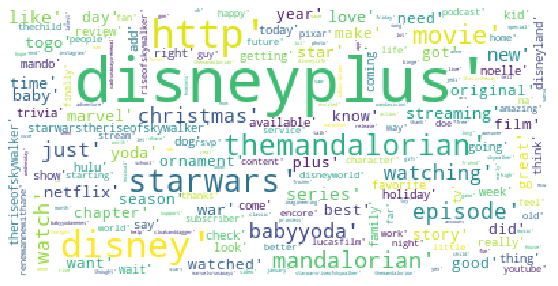

In [197]:
picture = WordCloud(background_color = 'white',collocations = False).generate(str(lemma))
plt.figure(figsize = (13,5))
plt.imshow(picture)
plt.axis('off')
plt.show()

Word Tagging

In [32]:
import collections
sentence = nltk.sent_tokenize(str(df_3.text))
token_word = [nltk.word_tokenize(t) for t in sentence]
pos_sent = [nltk.pos_tag(t) for t in token_word]
chunk_sentence = nltk.ne_chunk_sents(pos_sent, binary = False)
ner_categories = collections.defaultdict(float) 

for sent in chunk_sentence:
    for chunk in sent:
        if hasattr(chunk,'label'):
            ner_categories[chunk.label()] += 1 
print(ner_categories)            



defaultdict(<class 'float'>, {'ORGANIZATION': 9142.0, 'PERSON': 2854.0, 'FACILITY': 29.0, 'GPE': 1559.0, 'GSP': 11.0, 'LOCATION': 10.0})


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


([<matplotlib.patches.Wedge at 0x20580790da0>,
 [Text(-0.5730900028370794, 0.9389184462178791, 'ORGANIZATION'),
  Text(0.2041656687985051, -1.0808868486960415, 'PERSON'),
  Text(1.0289726220014068, -0.38886417059373063, 'GPE')])

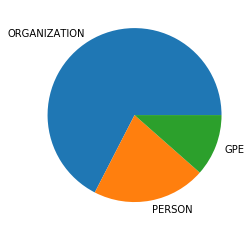

In [33]:
ddict = defaultdict(list)
for key,values in ner_categories.items():
    if key in ['ORGANIZATION','PERSON','GPE']:
        ddict[key].append(values)
        
ddict   

labels = list(ddict.keys())
values = [ddict.get(l) for l in labels]

plt.pie(values,labels=labels)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


Text(0.5, 1.0, 'fifth_week')

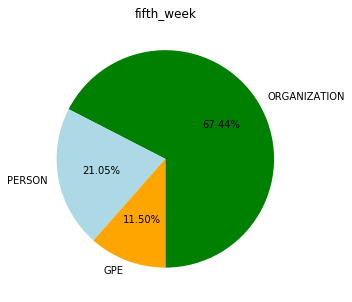

In [34]:
plt.figure(figsize = (5,5))
plt.pie(values, labels=labels, autopct = '%1.2f%%',startangle = 270,colors = ('green','lightblue','orange'))
plt.title('fifth_week')

In [38]:
chunk_sentence = nltk.ne_chunk_sents(pos_sent,binary = False)
for sent in chunk_sentence:
    for chunk in sent:
        if hasattr(chunk,'label'):
            print(chunk)

(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Lodge49/NNP)
(ORGANIZATION saveLodge49/JJ)
(PERSON Dumbos/NNP Circus/NNP)
(PERSON Pooh/NNP Corner/NNP)
(ORGANIZATION Umbrella/NNP Tree/NNP)
(ORGANIZATION DisneyPlus/NNP)
(FACILITY Suite/NNP Life/NNP)
(ORGANIZATION Zack/NNP)
(ORGANIZATION Wizards/NNP)
(ORGANIZATION Waverly/NNP Place/NNP)
(PERSON Hannah/NNP Montana/NNP)
(GPE That/NNP)
(PERSON Raven/NNP)
(ORGANIZATION Famous/NNP Jett/NNP Jackson/NNP)
(ORGANIZATION House/NNP)
(GPE Mouse/NNP)
(PERSON Jeff/NNP Goldblum/NNP Episode/NNP)
(PERSON Marvel/NNP Hero/NNP Project/NNP)
(PERSON Pooh/NNP Corner/NNP)
(PERSON Dumbos/NNP Circus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BRAINFREEZE/NNP)
(ORGANIZATION MerryChristmas/NNP)
(ORGANIZATION HUH/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Jeff/NNP Goldblum/NNP Episode/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Elf/NNP)
(ORGANIZATION UAT/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus

(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION WaltDisneyWorld/NNP)
(ORGANIZATION WaltDisneyWorld/NNP)
(ORGANIZATION WaltDisneyWorld/NNP)
(ORGANIZATION LizzieMcGuire/NNP)
(PERSON Lizzie/NNP)
(GPE Isabella/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Disney/NNP)
(ORGANIZATION WWE/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION RAW/NNP)
(ORGANIZATION RAWTonight/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Netflix/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Netflix/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION HBO/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Swat/NNP Kats/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Turner/NNP)
(PERSON Hooch/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Yoyda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION AlitaBattleAngel/NNP)
(ORGANIZATION KH3ReMind/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION KH3/NNP)
(PERSON Gordon/NNP Ramsay/NNP)
(ORGANIZATI

(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION THAN/NNP)
(PERSON Jason/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlusfail/NNP)
(ORGANIZATION MondayMood/NNP)
(ORGANIZATION MondayVibes/NNP)
(PERSON Togo/NNP)
(GPE Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Early/NNP)
(ORGANIZATION Disney/NNP Plus/CC)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Myself/NNP)
(ORGANIZATION StarWars/NNP)
(PERSON Schedule/NN)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlusOriginals/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyFilms/NNP)
(GPE Early/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Princess/NNP Mononoke/NNP)
(PERSON San/NNP)
(PERSON Ashitaka/NNP)
(ORGANIZATION Walt/NNP Disney/NNP)
(PERSON Style/NNP)
(ORGANIZATION Princess/NNP Mononoke/NNP)
(ORGANIZATION Disney/NNP)
(GPE Disney/NNP)
(ORGANIZ

(PERSON Source/NN)
(ORGANIZATION Discussing/NNP Film/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Hulu/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION HELL/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Chrome/NNP)
(ORGANIZATION DisneyPlusHelp/NNP)
(GPE Bridgertons/NNP)
(ORGANIZATION LittlehouseonthePrairie/NNP)
(PERSON Annewithane/NNP)
(PERSON Anneofgreengables/NNP)
(PERSON Stream/NNP)
(ORGANIZATION SaveAnneWithAnE/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Zootopia/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Get/NNP)
(ORGANIZATION NanoCell/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION MarvelsRunaways/NNPS)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION RenewCloakandDagger/NNP)
(ORGANIZATION RenewCloakandDaggerDisneyPlus/NNP)
(ORGANIZATION RenewMarvelsRunaways/N

(ORGANIZATION MarvelsRunaways/NNPS)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION RenewCloakandDagger/NNP)
(ORGANIZATION RenewCloakandDaggerDisneyPlus/NNP)
(ORGANIZATION RenewMarvelsRunaways/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION MondayThoughts/NNP)
(ORGANIZATION FBI/NNP)
(ORGANIZATION FBI/NNP)
(GPE U.S./NNP)
(ORGANIZATION Shittest/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION MarvelsRunaways/NNPS)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION RenewCloakandDagger/NNP)
(ORGANIZATION RenewCloakandDaggerDisneyPlus/NNP)
(ORGANIZATION RenewMarvelsRunaways/NNP)
(ORGANIZATION MarvelsRunaways/NNPS)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION RenewCloakandDagger/NNP)
(ORGANIZATION RenewCloakandDaggerDisneyPlus/NNP)
(ORGANIZATION RenewMarvelsRunaways/NNP)
(ORGANIZATION TRON/NNP)
(ORGANIZATION TRON/NN)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION Grid/NNP)
(PERSON Miss/NNP Matilda/NNP)
(GPE Please/NNP)
(ORGANIZATION MondayMood/NNP)
(ORGA

(ORGANIZATION DisneyPlus/NNP)
(GPE New/NNP)
(ORGANIZATION Nerf/NNP)
(ORGANIZATION FREE/NNP)
(ORGANIZATION Gen/NNP Xbox/NNP Series/NNP)
(ORGANIZATION Nerf/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION OCD/NNP)
(ORGANIZATION SonicMovie/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Rachel/NNP Rubin/NNP)
(GPE Radar/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION GoldenGlobes/NNP)
(PERSON Baby/NNP)
(ORGANIZATION Cold/JJ Outside/NNP)
(ORGANIZATION InthNews/NNP)
(PERSON Master/NNP Youtube/NNP Channel/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Oliver/NNP)
(ORGANIZATION Company/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BostonTeaParty/NNP)
(ORGANIZATION MondayMood/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION WatchmenHBO/NNP)
(ORGANIZATION ABCNews/NNP)
(GPE America/NNP)
(GPE Disney/NNP)
(PERSON Trivia/NNP)
(PERSON Light/NNP Lesson/NNP)
(ORGANIZATION MondayVibes/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)


(ORGANIZATION Disneyplus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Repost/NNP)
(ORGANIZATION McGuire/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Goldberg/NNP)
(ORGANIZATION RealMickFoley/NNP)
(ORGANIZATION SantaClaus/NNP)
(GPE Noelle/NNP)
(ORGANIZATION AnnaKendrick47/NNP)
(PERSON Noelle/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Hotstar/NNP Remains/NNP)
(PERSON Raises/NNP Key/NNP Brand/NNP Challenges/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION NOT/NNP)
(ORGANIZATION THE/NNP)
(ORGANIZATION SALAD/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Miki/NNP Ishikawa/NNP)
(ORGANIZATION MCU/NNP Spinoff/NNP)
(ORGANIZATION MikiIshikawa/NNP)
(ORGANIZATION AnthonyMackie/NNP)
(ORGANIZATION DanielBruhl/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION EmilyVanCamp/NNP)
(PERSON Marvel/NNP)
(ORGANIZATION SebastianStan/NNP)
(PERSON Adam/NNP Sandler/NNP Sings/NNP Song/NNP)
(GPE Frozen/NNP)
(ORGANIZATION AdamSandler/NNP)
(ORGANIZATION 

(ORGANIZATION StarWars/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Baby/NNP Yoda/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION BabyYodaTattoo/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION HBO/NNP)
(ORGANIZATION Geeks/NNP)
(PERSON Watch/NNP)
(ORGANIZATION Prisoner/NNP)
(PERSON Watchmen/NNP Eps/NNP)
(ORGANIZATION Into/NNP)
(GPE Wowza/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Worth/JJ)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Disney/NNP)
(ORGANIZATION ALSO/NNP)
(ORGANIZATION SAVE/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Facebook/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Red/NNP Carpet/NNP)
(ORGANIZATION NYC/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DuckTales/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Yoda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Finall

(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION Gunslinger/NNP)
(GPE Recap/NN)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BabyYoda/NNP)
(PERSON Check/NNP Out/NNP My/NNP)
(GPE Frontera/NNP)
(PERSON Pino/NNP Noir/NNP Red/NNP)
(ORGANIZATION PinotNoir/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION ALOT/NNP)
(PERSON Marvel/NNP)
(ORGANIZATION DareDevil/NNP)
(PERSON Jessica/NNP Jones/NNP)
(PERSON Iron/NNP Fist/NNP)
(GPE Mandalorian/JJ)
(PERSON Baby/NNP)
(ORGANIZATION DONT/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Noelle/NNP)
(ORGANIZATION THE/NNP)
(ORGANIZATION PROUD/NNP)
(ORGANIZATION FAMILY/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Busted/NNP)
(PERSON Netflix/NNP)
(PERSON Chill/NNP New/NNP Hotness/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Nick/NNP Robinson/NNP)
(PERSON Michael/NNP Cimino/NNP)
(ORGANIZATION MichaelCimino/NNP)
(ORGANIZATIO

(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlusOnVerizon/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION Disney/NNP)
(PERSON Brave/NNP)
(ORGANIZATION BTBB/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Ours/NNP)
(ORGANIZATION GAGAHAHAHAH/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Star/NNP Wars/NNP Rebels/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Season/NNP)
(ORGANIZATION DarkRey/NNP)
(ORGANIZATION RiseofSkywalker/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION NCBD/NNP)
(PERSON Marvel/NNP)
(ORGANIZATION MarvelsRunaways/NNP)
(ORGANIZATION ImageComics/NNPS)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Monkeys/NNP Fighting/NNP)
(ORGANIZATION GSHSGSHS/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DOP/NNP)
(GPE Togo/NNP)
(PERSON Ericson/NNP Core/NNP)
(PERSON Alberta/NNP)
(ORGANIZATION BTS/NNP)
(ORGANIZATION Rockies/NNPS)
(O

(ORGANIZATION ARRadio/NNP)
(ORGANIZATION NXTWAVE/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BabyYoda/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Marvel/NNP)
(PERSON End/NNP Credit/NNP Scenes/NNP Are/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Wonder/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Disneyland/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION PERFECT/NNP)
(GPE Babyyyy/NNP)
(PERSON Frozen/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION Gummi/NNP Bears/NNP Analysis/NNP)
(ORGANIZATION GummiBears/NNP)
(ORGANIZATION ZummiGummi/NNP)
(ORGANIZATION DisneyChannel/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION Arrives/NNP Tomorrow/NNP)
(PERSON Sneak/NNP Peek/NNP)
(FACILITY The/DT Rise/NNP)
(GPE Skywalker/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Elsa/NNP)
(PERSON Anna/NNP)
(GPE Geox/NNP)
(G

(ORGANIZATION LoveOnTour2020/NNP)
(ORGANIZATION USA/NNP)
(GPE India/NNP)
(ORGANIZATION CatsMovie/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Star/NNP Wars/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Google/NNP)
(GPE Mandalorian/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Someone/NN)
(ORGANIZATION BabyYoda/NNP)
(PERSON Lilly/NNP)
(PERSON Miley/NNP)
(PERSON Hannah/NNP Montana/NNP)
(PERSON Harper/NNP)
(PERSON Alex/NNP Vs/NNP Alex/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Harper/NNP)
(ORGANIZATION Harper/NNP)
(LOCATION Far/NNP From/NNP Home/NNP)
(PERSON Twitter/NNP Instagram/NNP)
(ORGANIZATION MarvelsRunaways/NNPS)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION RenewCloakandDagger/NNP)
(ORGANIZATION RenewMarvelsRunaways/NNP)
(ORGANIZATION TMS011/NNP)
(GPE Mandalorian/JJ)
(PERSON Remnant/NNP Stormtrooper/NNP Collectible/NNP Figure/NNP)
(ORGANIZATION HotToys/NNP)
(ORGANIZATION TMS011/NNP)
(ORGANIZATION RemnantStormtrooper/NNP)
(ORGANIZATIO

(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION HomeAlone2/NNP)
(PERSON Kevin/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Netflix/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DISNEY/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION HomeForTheHolidays/NNP)
(ORGANIZATION NYC/NNP)
(ORGANIZATION NYCDEATHROWCATS/NNP)
(ORGANIZATION NewYork/NNP)
(ORGANIZATION FREE/NNP)
(PERSON Callng/NNP)
(GPE Angels/NNP)
(PERSON Foster/NNP)
(ORGANIZATION PLEDGE/NNP)
(GPE Mandalorian/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Return/NNP)
(ORGANIZATION Jedi/NNP)
(ORGANIZATION TERRIBLE/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION IoT/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DenzelWashington/NNP)
(GPE Zenon/NNP)
(ORGANIZATION Century/NNP Lizzie/NNP)
(PERSON Italian/JJ Lizzie/NNP)
(PERSON Proto/NNP Zoa/NNP)
(ORGANIZATION SuperNova/NNP)
(ORGANIZATI

(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION SpiderMan/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Phantom/NNP Menace/NNP)
(ORGANIZATION Clones/NNPS)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Disney/NNP)
(GPE Thrones/NNP)
(PERSON Ppl/NNP)
(PERSON Star/NNP Wars/NNP Mandalorian/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION StarWarsMandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DarkwingDuck/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Netflix/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Video/NNP First/NNP)
(PERSON Set/NNP Photos/NNP)
(ORGANIZATION WandaVison/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Marvel/NNP)
(ORGANIZATION KumailNanjiani/NNP)
(ORGANIZATION BlackWidow/NNP)
(ORGANIZATION WonderWoman1984/NNP)
(ORGANIZATION BirdsOfPrey/NNP

(GPE Drake/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Frozen/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Weekenders/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Night/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DEALS/NNP)
(ORGANIZATION MinnieMouse/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION GiftAGamer/NNP)
(ORGANIZATION MariahCarey/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Dave/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Real/NNP)
(ORGANIZATION DisneyPlus/JJ)
(PERSON Gordon/NNP Ramsey/NNP Uncharted/NNP Season/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Ronda/NNP Rousey/NNP Rumored/NNP)
(PERSON Kevfeige/NNP)
(GPE Disney/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BabyYoda/NNP)
(PERSON Christmas/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION GeorgeLopez/NNP)
(GPE Mandalorian/JJ)
(GPE Mandelorian/JJ)
(ORGANIZAT

(ORGANIZATION DisneyPlus/NNP)
(PERSON Castle/NNP)
(ORGANIZATION DisneyPlus/JJ)
(ORGANIZATION MONEYMAKERBUSINESS/NNP)
(ORGANIZATION MMB/NNP)
(ORGANIZATION MiamiVip/NNP)
(PERSON Isles/NNP Beach/NNP)
(GPE Florida/NNP)
(ORGANIZATION DisneyPlus/NNP One/CD)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mando/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Pepper/NNP Ann/NNP)
(ORGANIZATION PepperAnn/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON School/NNP)
(ORGANIZATION StarWars/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/JJ)
(PERSON Netflix/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(PERSON Disney/NNP)
(ORGANIZATION ABC/NNP)
(PERSON Disney/NNP)
(ORGANIZATION Disney/NNP)
(PERSON Yoda/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Noelle/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(OR

(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlusAU/NNP)
(PERSON Christmas/NNP)
(PERSON Merry/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Star/NNP Wars/NNP Episode/NNP)
(ORGANIZATION Part/NNP Of/IN The/DT Star/NNP Wars/NNP Marathon/NNP)
(ORGANIZATION Disney/NNP Plus/NNP)
(ORGANIZATION Release/NNP Of/IN Star/NNP Wars/NNP)
(PERSON Skywalker/NN)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION ANewHope/NNP)
(ORGANIZATION SkywalkerSaga/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Vintage/NNP Disney/NNP Dinosaurs/NNP)
(PERSON Cards/NNP Gibson/NNP)
(ORGANIZATION Mama/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION NotTheMama/NNP)
(FACILITY Baron/NNP Zemo/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Sam/NNP Wilson/NNP)
(PERSON Bucky/NNP)
(PERSON Click/NNP)
(PERSON Movies/NNP Added/NNP)
(GPE Canada/NNP)
(ORGANIZATION TheMandalorian/NNP)
(ORGANIZATION DisneyPlus/NNP Directed/NNP)
(GPE Brittany/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Noelle/NNP)
(ORGANIZATION ChristmasMovi

(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Netflix/NNP)
(ORGANIZATION DisneyPlus/JJ)
(ORGANIZATION MarvelsRunaways/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION MarvelsRunaways/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/JJ)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Deborah/NNP Chow/NNP)
(ORGANIZATION TROS/NNP)
(ORGANIZATION Netflix/NNP)
(PERSON Baby/NNP Yoda/NNP)
(PERSON Join/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE New/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION IHaveSpoken/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Netflix/NNP)
(ORGANIZATION BBC/NNP)
(ORGANIZATION Good/JJ Omens/NNS)
(PERSON Amazon/NNP Prime/NNP)
(ORGANIZATION BBC/NNP)
(ORGANIZATION LicenceFee/NNP)
(PERSON Unfair/NNP)
(ORGANIZATION GoodOmens/NNP)
(ORGANIZATION 

(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/NN)
(ORGANIZATION Disney/NNP Plus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Does/NNP)
(ORGANIZATION JustAnotherFanboy/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/JJ)
(GPE Dutch/NNP)
(GPE Netherlands/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/NNP)
(GPE Malaysia/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyParks/NNP)
(GPE Disneyland/NNP)
(ORGANIZATION WaltDisneyWorld/NNP)
(ORGANIZATION YourFavoriteCoasterSucks/NNP)
(ORGANIZATION UrFavCoasterSux/NNP)
(PERSON Mickey/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Jon/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Baby/NNP Yoda/NNP Show/NNP)
(ORGANIZATION VII/NNP)
(ORGANIZATION Rise/NNP)
(GPE Skywalker/NNP)
(PERSON Mando/NNP)
(ORGANIZATION STARWARS/NNP)
(PERSON Varsha/NNP Waishampayan/NNP)
(PERSON Baby/NNP Yoda/NNP)
(GPE Growth/NNP)
(PERSON Varsha/NNP Waishampayan/NNP)
(PERSON Baby/NNP Yoda/NNP)
(GPE Growth/NNP)
(ORGANIZATION D

(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/NNP)
(PERSON Gummi/NNP Bears/NNP)
(ORGANIZATION ErrorCode83/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Chrome/NNP)
(ORGANIZATION ObiWan/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Sorry/NNP)
(GPE Screen/JJ)
(GPE Mandalorian/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION VIZIO/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Service/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Japan/NNP)
(ORGANIZATION GUYS/NNP)
(ORGANIZATION LOOK/NNP)
(ORGANIZATION SebastianStan/NNP)
(ORGANIZATION BuckyBarnes/NNP)
(PERSON Marvel/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/NNP)
(ORGANIZATION Prisoner/NN)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION NFLX/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(PERSON Netflix/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION WHYYY/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Cordless/NNP Screwdriver/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION GembritAwards2019/NNP)
(ORGANIZATI

(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP Marathon/NNP)
(ORGANIZATION Lost/NNP Lamp/NNP)
(ORGANIZATION MWoO/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Lilo/NNP)
(PERSON Oliver/NNP)
(ORGANIZATION Company/NNP)
(ORGANIZATION DisneyPlus/NNP Marathon/NNP)
(ORGANIZATION Cheetah/NNP)
(PERSON Will/NNP Star/NNP Wars/NNP)
(PERSON Skywalker/NNP Come/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Start/NNP Wars/NNP Ep/NNP)
(PERSON Rogue/NNP One/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Backstage/NNP Collection/NNP)
(ORGANIZATION DisneyStudios/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Beast/NNP)
(ORGANIZATION Apocalypse/NNP Ship/NNP)
(PERSON Gilbert/NNP)
(ORGANIZATION SaveAnneWithAnE/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Lizzie/NNP McGuire/NNP)
(GPE Vegas/NNP)
(ORGANIZATION DisneyPlus/NNP Marathon/NNP)
(ORGANIZATION Disney/NNP Save/NNP Anne/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP Marathon/NNP)
(ORGANIZATION Cheetah/NNP 

(PERSON Lilly/NNP)
(ORGANIZATION Muppets/NNPS)
(PERSON Silver/NNP Lake/NNP)
(GPE Los/NNP Angeles/NNP)
(PERSON Star/NNP Vs/NNP)
(GPE Evil/NNP)
(PERSON Season/NNP)
(ORGANIZATION SVTFOE/NNP)
(PERSON Million/NNP Dollar/NNP)
(GPE Eddie/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Canada/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Liberals/NNS)
(ORGANIZATION CANCON/NNP)
(PERSON Netflix/NNP)
(ORGANIZATION AmazonPrime/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Star/NNP Wars/NNP Episode/NNP II/NNP)
(ORGANIZATION
  Clones/NNP
  As/IN
  Part/NNP
  Of/IN
  The/DT
  Star/NNP
  Wars/NNP
  Marathon/NNP)
(ORGANIZATION Disney/NNP Plus/NNP)
(ORGANIZATION Release/NNP Of/IN Star/NNP)
(ORGANIZATION Rise/NNP Of/IN Skywalker/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION SkywalkerSaga/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION HSMTMTS/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Episode/NNP)


(PERSON Free/NNP Solo/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Star/NNP Wars/NNP)
(PERSON Came/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Blind/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Via/NNP)
(ORGANIZATION PlayStation/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Anna/NNP Kendrick/NNP)
(ORGANIZATION SUPER/NNP)
(GPE Noelle/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Encore/NNP)
(GPE Oklahoma/NNP)
(GPE Good/JJ)
(ORGANIZATION Dash/NNP Rendar/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION NerdsTalk/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Newest/NNP Mandalorian/NNP)
(ORGANIZATION Mall/NNP Santa/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Hot/NNP Diggity/NNP Dog/NNP)
(PERSON Lady/NNP)
(ORGANIZATION Tramp/NN)
(ORGANIZATION PodernFamily/NNP)
(ORGANIZATION OTT/NNP)
(PERSON Netflix/NNP)
(ORGANIZATION AmazonPrimeVideo/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Seven/NNP Dwarves/NNP)
(GPE Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZ

(ORGANIZATION DisneyP/NNP)
(GPE Togo/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Animated/NNP)
(GPE Past/NNP)
(ORGANIZATION Part/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION OF/NNP)
(ORGANIZATION BrynnWilliams/NNP)
(ORGANIZATION Christmas/NNP)
(ORGANIZATION TheMuppets/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION SVTFOE/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Music/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION ATLA/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/JJ)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION Numbered/NNP)
(ORGANIZATION THR/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP Star/NNP Wars/NNP)
(PERSON Obi/NNP)
(ORGANIZATION Wan/NNP)
(ORGANIZATION KOTOR/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWars/NNP)
(GPE Ah/NN)
(G

(GPE Look/NN)
(ORGANIZATION WYNN/NNP)
(PERSON Macau/NNP)
(ORGANIZATION AAPL/NNP)
(PERSON Christmas/NNP Ornament/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Christmas/NNP Ornament/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Christmas/NNP Ornament/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Husky/NNP)
(PERSON Christmas/NNP Ornament/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Sunflower/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Horse/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWars/NNP)
(PERSON Lab/NNP Brown/NNP Labrador/NNP Retriever/NNP)
(PERSON Christmas/NNP Ornament/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Simpsons30/NNP)
(ORGANIZATION CatOrnament/NNP)
(PERSON Cat/NNP Christmas/NNP Ornament/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Hippie/NNP Christmas/NNP Ornament/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Flower/NNP Christmas/NNP Ornament/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Frenchbulldog/NNP Christmas/NNP 

(PERSON Stitch/NNP Has/NNP)
(GPE Glitch/NNP)
(ORGANIZATION Movie/NNP)
(GPE Stitch/NNP)
(PERSON Nani/NNP)
(PERSON David/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION ROACHES/NNP)
(ORGANIZATION REVIEW/NNP)
(GPE MANDALORIAN/NNP)
(ORGANIZATION THE/NNP)
(ORGANIZATION YouTube/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION ROACHES/NNP)
(ORGANIZATION REVIEW/NNP)
(GPE MANDALORIAN/NNP)
(ORGANIZATION THE/NNP)
(ORGANIZATION YouTube/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BabyYoda/NNP)
(GPE Stitch/NN)
(PERSON Uncle/NNP Jumba/NNP)
(ORGANIZATION Lilo/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Baby/NNP Chewbacca/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Obi/NNP Wan/NNP)
(GPE Hope/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION ObiWan/NNP)
(GSP US/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Lilo/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Manda

(GPE America/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION JohnBoyega/NNP)
(GPE Pretty/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION FinnPoe/NNP)
(PERSON Life/NNP)
(ORGANIZATION DisneyPlus/JJ)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Mado/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION WTF/NNP)
(ORGANIZATION ItIsTheWay/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BoyMeetsWorld/NNP)
(GPE Thanks/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION CSS/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Deborah/NNP Chow/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION DeborahChow/NNP)
(ORGANIZATION DisneyPlus/NNP Christmas/NNP)
(ORGANIZATION BabyYodameme/NNP)
(GPE Brazil/NNP)
(GPE Hey/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION AWAE/NNP)
(ORGAN

(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION MelGibson/NNP)
(ORGANIZATION THE/DT)
(ORGANIZATION BEST/NNP)
(ORGANIZATION MESSED/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Strong/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION IHaveSpoken/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/JJ)
(ORGANIZATION SVTFOE/NNP)
(GPE Anyone/NN)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BehindtheScenes/NNP)
(GPE Wow/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION IHaveSpoken/NNP)
(ORGANIZATION BabyYoda/NNP)
(GPE Mandalorian/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/NNP)
(ORGANIZATION DisneyPlus/JJ)
(PERSON Baby/NNP Yoda/NNP)
(ORGANIZATION SEASON/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION OscarIsaac/NNP)
(ORGANIZATION KeriRussell/NNP Interview/NNP)
(GPE Russell/NNP)
(PERSON Perri/NNP)
(ORGANIZATION ZoriiBliss/NNP)
(ORGANIZATION StarWars/NNP)
(PE

(ORGANIZATION Godspell/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Disney/NNP Plus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Onward/NNP)
(GPE Tonight/NNP)
(ORGANIZATION Bug/NNP)
(ORGANIZATION Star/NNP Wars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Godspell/NNP)
(PERSON Marshal/NNP)
(PERSON Stephen/NNP Schwartz/NNP)
(PERSON Next/NNP)
(PERSON Panchito/NNP Pistoles/NNP)
(PERSON Happy/JJ)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION TOGO/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/NNP)
(ORGANIZATION DAMN/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BLOG/NNP)
(ORGANIZATION Christmas/NNP Movies/NNPS)
(PERSON Netflix/NNP)
(GPE Link/NN)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION PrimeVideo/NNP)
(ORGANIZATION ChristmasMovies/NNP)
(ORGANIZATION Disneyplus/NNP)
(PERSON
  Garbage/NNP
  Picking/NNP
  Field/NNP
  Goal/NNP
  Kicking/NNP
  Philadelphia/NNP)
(PERSON Togo/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Berry/NNP Bear/NNP C

(ORGANIZATION MarvelStudios/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(PERSON Duck/NNP)
(GPE Tales/NNP)
(PERSON Chip/NNP N/NNP)
(PERSON Dale/NNP Rescue/NNP Rangers/NNP)
(PERSON Tail/NNP Spin/NNP)
(PERSON Gummi/NNP Bears/NNP)
(PERSON Darkwing/NNP Duck/NNP)
(PERSON Gargoyles/NNP)
(ORGANIZATION CatsMovie/NNP)
(ORGANIZATION FIFA20/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Encore/NNP)
(ORGANIZATION BEST/NNP)
(ORGANIZATION FiddlerontheRoof/NNP)
(GPE Disney/NNP)
(PERSON Trivia/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Tonight/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Netherlands/NNP)
(ORGANIZATION CatsMovie/NNP)
(ORGANIZATION FIFA20/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Everyone/NN)
(ORGANIZATION RiseOfTheSkywalker/NNP Good/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION HamillHimself/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION NewHope/NNP)
(PERSON Deborah/NN

(ORGANIZATION Yup/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Togo/NNP)
(ORGANIZATION Original/JJ Movie/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Togo/NNP)
(ORGANIZATION Original/JJ Movie/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Togo/NNP)
(ORGANIZATION Original/JJ Movie/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Disney/NNP)
(PERSON Arendelle/NNP Castle/NNP Yule/NNP Log/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION AWESOME/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION RogueOne/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Star/JJ Wars/NNP)
(FACILITY Logan/NNP Production/NNP Studios/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyServiceDogs/NNP New/NNP)
(ORGANIZATION MUST/NNP Stream/NNP Series/NNP)
(ORGANIZATION Magic/NNP)
(ORGANIZATION Jeff/NNP Goldblum/NNP)
(PERSON Spike/NNP Lee/NNP)
(ORGANIZATION Gold

(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Netflix/NNP)
(ORGANIZATION FU/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(PERSON Disney/NNP)
(ORGANIZATION DisneyPlus/JJ)
(ORGANIZATION Disneyplus/NNP)
(PERSON Noelle/NNP)
(ORGANIZATION DisneyPlus/JJ)
(ORGANIZATION BabuFrik/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Christmas/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION UpLate/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Mercari/NNP)
(GPE Disneyland/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION FunkoPop/NNP)
(PERSON Love/NNP Lucyâ€/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Lucasfilm/NNP)
(PERSON Caravan/NNP)
(ORGANIZATION Battle/NNP For/IN Endor/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATI

(GPE MSNBC/NNP)
(GPE Mandalorian/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/NNP)
(ORGANIZATION Darth/NNP)
(GPE Disney/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DarthVader/NNP)
(GPE Search/NNP)
(PERSON Noelle/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Cheap/NNP Tonight/NNP)
(PERSON Amazon/NNP Method/NNP)
(PERSON Method/NNP Fornite/NNP Free/NNP V/NNP Bucks/NNP)
(ORGANIZATION ATM/NNP Method/NNP)
(PERSON Method/NNP)
(PERSON Netflix/NNP Acc/NNP Etc/NNP)
(GPE Hmu/NNP)
(ORGANIZATION UberEats/NNP)
(ORGANIZATION XboxOne/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Download/NN)
(ORGANIZATION NOW/NNP)
(ORGANIZATION TurnerAndHooch/NNP)
(ORGANIZATION DisneyPlus/JJ)
(ORGANIZATION TeganNoxWWE_/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Noelle/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Baby/NNP Yoda/NNP)
(GSP Philadelphia/NNP)
(GPE Mandalorian/NNP)
(ORGANIZATION NOT/NNP)
(ORGANIZATION PickOfTheLitter/NNP)

(PERSON Netflix/NNP Reacts/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION IHaveSpoken/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION LizzieMcGuire/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION AmazonPrimeVideo/NNP)
(GPE Awesome/NNP)
(PERSON Holes/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Home/NNP Alone/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Delta/NNP)
(PERSON Delta/NNP SkyMiles/NNP)
(ORGANIZATION AnimeUSA/NNP)
(PERSON Togo/NNP)
(GPE Dog/NNP)
(PERSON Willem/NNP)
(ORGANIZATION Dafoe/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION SALES/NNP)
(ORGANIZATION DEALS/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyFamily/NNP)
(ORGANIZATION DisneyStyle/NNP)
(ORGANIZATION BillsMafia/NNP)
(ORGANIZATION MerryChrismas/NNP)
(ORGANIZATION CNN/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Willem/NNP Dafoe/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Time/NN

(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Nuestro/NNP Jomerâ€/NNP)
(ORGANIZATION DiaryOfAFuturePresident/NNP)
(ORGANIZATION ThatsSoDDO/NNP)
(ORGANIZATION DisneyPlusOriginal/NNP)
(GPE Nobody/NN)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Ma/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Canada/NNP)
(GPE Disney/NNP)
(PERSON Source/NN)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Disneyland/NNP)
(ORGANIZATION Pedogate/NNP)
(ORGANIZATION EpsteinCoverup/NNP)
(ORGANIZATION WWG1WGA/NNP)
(PERSON Jon/NNP Favreau/NNP)
(ORGANIZATION SpiderMan/NNP Far/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Star/NNP Wars/NNP)
(ORGANIZATION MoonKnight/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DanielRadcliffe/NNP)
(ORGANIZATION IronWill/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION MrRobot/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BDWong/NNP)
(P

(PERSON Marvel/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DuckTales/NNS)
(GPE Life/NNP)
(ORGANIZATION DuckTales/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION MacHackerNC/NNP)
(PERSON Master/NNP Youtube/NNP Channel/NNP)
(ORGANIZATION WhatIf/NNP)
(ORGANIZATION CaptainAmerica/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Netflix/NNP Viewers/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Disney/NNP)
(PERSON Trivia/NNP)
(PERSON Togo/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Dale/NNP)
(ORGANIZATION Rescue/NNP Rangers/NNPS Analyis/NNP)
(ORGANIZATION ChipnDalesRescueRangers/NNP)
(ORGANIZATION ChipandDale/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyChannel/NNP)
(ORGANIZATION DISNEY/NNP)
(ORGANIZATION STATES/NNPS)
(ORGANIZATION SO/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Night/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION JioSaavn/NNP)
(ORGANIZATION JioCinema/NNP)
(ORGANIZATION ARRehman/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZAT

(ORGANIZATION Disney/NNP)
(ORGANIZATION LINEUP/NNP)
(ORGANIZATION DISNEY/NNP)
(GPE Onward/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(PERSON Han/NNP)
(ORGANIZATION C3PO/NNP)
(ORGANIZATION HanSolo/NNP)
(ORGANIZATION C3PO/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Balto/NNP)
(PERSON Damn/NNP)
(GPE Ahhh/NNP)
(PERSON Gordo/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Empire/NNP)
(ORGANIZATION Imperial/NNP Walkers/NNP)
(PERSON Fuzzy/NNP Times/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION IronWill/NNP Watched/NNP)
(PERSON Hooray/NNP)
(PERSON Iron/NNP)
(GPE Rise/NNP)
(PERSON Poor/NNP)
(GPE Chap/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION SERIOUSLY/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Stupid/JJ)
(ORGANIZATION Darth/NNP Vader/NNP Performance/NNP Report/NNP)
(ORGANIZATION DarthVader/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSO

(PERSON Happy/NNP New/NNP Years/NNP)
(ORGANIZATION TheProudFamily/NNP)
(ORGANIZATION BruceSmith/NNP)
(ORGANIZATION PennyProud/NNP)
(ORGANIZATION TrudyProud/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION AlisaReyes/NNP)
(PERSON Disney/NNP)
(PERSON Revive/NNP Anne/NNP)
(PERSON Baby/NNP Fan/NNP)
(ORGANIZATION DEALS/NNP)
(ORGANIZATION MinnieMouse/NNP)
(ORGANIZATION Disneyland/NNP)
(ORGANIZATION Disney/NNP)
(PERSON Big/NNP Red/NNP)
(ORGANIZATION HSMTMTS/NNP)
(ORGANIZATION Continue/NNP)
(PERSON Togo/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION ABC/NNP)
(ORGANIZATION AppleTVPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION CelebratingStanLee/NNP)
(ORGANIZATION Star/NNP Wats/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NN)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Baby/NNP Yoda/NNP)
(GPE Repeat/NN)
(PERSON Baby/NNP)
(ORGANIZATION Yod

(ORGANIZATION DisneyPlus/NNP)
(PERSON Noelle/NNP)
(PERSON Scott/NNP Murphy/NNP)
(PERSON Dunkin/NNP)
(GPE Americas/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Baby/NNP Yoda/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/JJ)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BabyYoda/NNP)
(PERSON Togo/NNP)
(ORGANIZATION Original/JJ Movie/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Netflix/NNP)
(PERSON Togo/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Silver/NNP)
(PERSON Available/NNP)
(GPE Netherlands/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Marvel/NNP)
(GPE Trivia/NNP)
(FACILITY Tara/NNP Rose/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Frozen/NNP)
(ORGANIZATION Disneyplus/NNP)
(PERSON Netflix/NNP)
(PERSON Christmas/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Makerbot/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Togo/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Daisy/NNP)

(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BabyYoda/NNP)
(PERSON Captain/NNP America/NNP)
(ORGANIZATION StarWars/NNP)
(PERSON Harvey/NNP Korman/NNP)
(PERSON Art/NNP Carney/NNP)
(PERSON Bea/NNP Arthur/NNP)
(GPE Chewbacca/NNP)
(ORGANIZATION BabyYoda/NNP Funny/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Gargoyles/NNS)
(ORGANIZATION KickAxe/NNP)
(GPE Use/NNP)
(ORGANIZATION GIFT2019/NNP)
(ORGANIZATION BabyYoda/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION KickAxe/NNP)
(GPE Awesome/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Hanukkah/NNP)
(ORGANIZATION Disney/NNP)
(PERSON Togo/NNP)
(ORGANIZATION Original/JJ Movie/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Lucasfilm/NNP Do/NNP)
(ORGANIZATION StarWarsLegends/NNP Content/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION Host/NN)
(PERSON John/NNP Rocha/NNP)
(ORGANIZATION Blerd

(PERSON Anton/NNP)
(GPE Germany/NNP)
(PERSON Jersey/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Netflix/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Disney/NNP Plus/NNP)
(GPE India/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION IronMan/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION AvengersEndgame/NNP)
(GPE Tbh/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Share/NN)
(ORGANIZATION DisneyPlusIcon/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DolbyCinema/NNP)
(PERSON Real3D/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(PERSON Blank/NNP Check/NNP)
(PERSON Always/NNS)
(PERSON Shay/NNP)
(PERSON Karen/NNP)
(ORGANIZATION Duffy/NNP)
(ORGANIZATION Disney/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BlankCheck/NNP)
(PERSON Hook/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/JJ)
(GPE Switch/NNP)
(GPE Same/NNP)
(PERSON Darth/NNP Maul/NNP)
(ORGANIZATION DisneyPlus/

(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandalorian/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION KristenBell/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION ImAlsoEatingChips/NNP)
(ORGANIZATION DillPickle/NNP)
(FACILITY Which/NNP Star/NNP Wars/NNP Disney/NNP Plus/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION ObiWanKenobi/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION BenSolo/NNP)
(ORGANIZATION reyandKylo/NN)
(GPE Mandelorian/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Mandelorian/JJ)
(GPE Cassian/JJ)
(ORGANIZATION Disney/NNP Plus/NNP)
(ORGANIZATION StarWars/NNP)
(ORGANIZATION SkywalkerSaga/NNP)
(ORGANIZATION DisneyPlus/NNP)
(ORGANIZATION

(PERSON Togo/NNP)
(ORGANIZATION Original/JJ Movie/NNP)
(ORGANIZATION DisneyPlus/NNP)
(GPE Disney/NNP)
(GPE Alberta/NNP)
(GPE Look/NN)
(ORGANIZATION DisneyPlus/JJ)
(GPE Yep/NN)
(ORGANIZATION Sutherland/NNP Global/NNP Services/NNPS)


In [52]:
df_3.isna().sum()
text = df_3['text'].dropna(how = 'any')
text[3]

'The World According To Jeff Goldblum Episode 109 â€“ â€œCoffeeâ€\x9d Disney+ Preview https://ift.tt/36DH159 #disneyplus'

sentiment analysis

In [53]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
sentiment_3 = text.apply(sid.polarity_scores)


In [54]:
dict_3 = defaultdict(list)

for subdict in sentiment_3:
    for key,values in subdict.items():
        dict_3[key].append(values)

for key,values in dict_3.items():
    print(key,sum(values)/len(values))

neg 0.040905805687203804
neu 0.8496214454976309
pos 0.10947492101105874
compound 0.18815333728278055


In [55]:
df3_senti = pd.DataFrame.from_dict(dict_3,orient = 'index')
df3_senti = df3_senti.T
len(df3_senti.loc[df3_senti['compound']>0,'compound'])

2382

In [57]:
df3_senti.describe()

,neg,neu,pos,compound
count,5064.000000,5064.000000,5064.000000,5064.000000
mean,0.040906,0.849621,0.109475,0.188153
std,0.082722,0.145836,0.131225,0.423564
min,0.000000,0.127000,0.000000,-0.961100
25%,0.000000,0.753000,0.000000,0.000000
50%,0.000000,0.861000,0.071000,0.000000
75%,0.050000,1.000000,0.190000,0.556300
max,0.714000,1.000000,0.873000,0.980800


compare the overall score with graph

Text(0.5, 1.0, 'Three weeks positive comment')

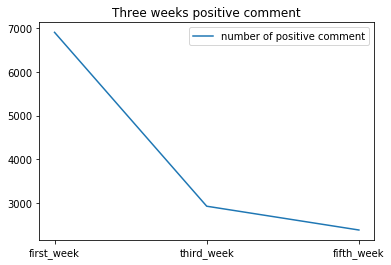

In [206]:
import matplotlib.pyplot as plt
p_n = (6910,2927,2382)
y = ('first_week','third_week','fifth_week')
plt.plot(y,p_n,label = 'number of positive comment')
plt.legend(loc = 'upper right')
plt.title('Three weeks positive comment')

Text(0.5, 1.0, 'sentiment_analysis')

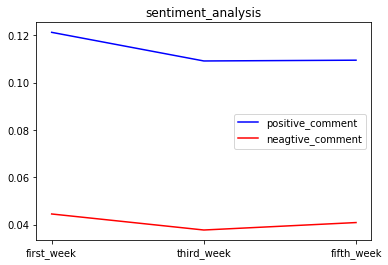

In [207]:
positive = (0.12123887420530019,0.10914619787407996,0.10947492101105874)
negative = (0.044528823487392025,0.03775682747342597,0.040905805687203804)
plt.plot(y,positive,c = 'b',label = 'positive_comment')
plt.plot(y,negative,c = 'r',label = 'neagtive_comment')
plt.legend(loc = 'center right')
plt.title('sentiment_analysis')

            positive   neutral  negative
first_week  0.121239  0.834230  0.044529
third_week  0.109146  0.853098  0.037757
fifth_week  0.109475  0.849621  0.040906


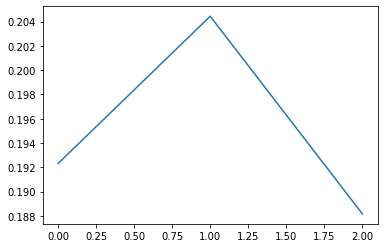

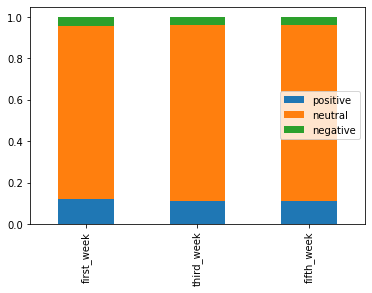

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
first = [0.12123887420530019,0.834230,0.044528823487392025]
second = [0.10914619787407996,0.853098,0.037757]
y = ('first_week','third_week','fifth_week')
third = [0.10947492101105874,0.849621,0.040905805687203804]
X = (0.19230367169083487,0.20444081766148856,0.18815333728278055)
dff = pd.DataFrame(np.asarray([first,second,third]),index=['first_week','third_week','fifth_week'],columns = ['positive','neutral','negative'])
print(dff.head())
plt.plot(X)
dff.plot.bar(stacked=True)
plt.show()

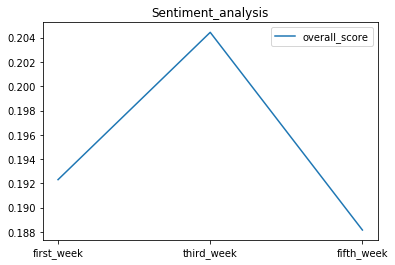

In [209]:
import matplotlib.pyplot as plt
X = (0.19230367169083487,0.20444081766148856,0.18815333728278055)
y = ('first_week','third_week','fifth_week')
plt.plot(y,X,label = 'overall_score')
plt.title('Sentiment_analysis')
plt.legend(loc = 'upper right')